# Abalone age prediction

## quick overview:
Species abalone: Blacklip

Missing values: No

Data recorded: 1982-1984

Methods of data collection:
- reviewing existing data
- gathering data from fishers
- field surveys
- tagging and monitoring abalones

Feature count: 9

Target: Rings

Rows: 4176

## goal and dataset origin

This notebook covers the process on how the age of an abalone is predicted correctly based on the abalones physical features like length, height, weight and so on.The predictions is useful for plenty of sectors. It can be used in the to grade the abalones correctly which would help put a price tag on them which is a great tool for retailers. Fishers wouldn't over fish them as easily because the tool can help them know the age distribution of a abalone population in their area. Scientists can make use of the tool by knowing a abalones age by checking their size which would mean it is easier for them to examine and note the abalones behavior, mortality rate, longevity. And these are just a few examples to show that this 1 tool can benefit many.

This dataset will be used for this notebook [recorded abalone physical traits.](https://archive.ics.uci.edu/dataset/1/abalone) The steps taken will follow the path of the [AI project methodology](https://fhict.instructure.com/courses/13770/pages/ai-project-methodology?module_item_id=1071124) given to us by school. The end goal of this notebook is to prove the same things I showed in my personal challenge while working more independently and with more confidence. The reason why is that my coach (Alexander) told me that if I do that then the grades will be just fine.

To determine the age of an abalone the shell needs to be cut through the cone, staining it and then count the number of rings through a microscope.After counting the rings, add 1.5 on top of that and you got yourself the abalones age. However the age can also be predicted by measuring their physical appearance. This information is easier to obtain compared to the process of counting the rings. More information like weather patterns, location, food availability may be required to make acceptable predictions according to the description of where the database is downloaded from. This version of the dataset has no missing values. The original data examples with missing values are removed because the majority have the predicted value missing. The ranges of continuous values have been scaled for use with an ANN (Artificial Neural Network) so it is divided by 200.

Database donor:
[Sam Waugh](https://ieeexplore.ieee.org/author/37332838000) is the donor of the database and did this while he was part of the University of Tasmania, specifically for the department of computer science. The data got donated on 11-30-1995

The database is owned by the following parties:
- Marine Resources Division
- Marine Research Laboratories - Taroona
- Department of Primary Industry and Fisheries, Tasmania

The original data (before the earlier mentioned edits) comes from a [non machine learning study](https://www.researchgate.net/profile/Warwick-Nash/publication/287546509_7he_Population_Biology_of_Abalone_Haliotis_species_in_Tasmania_I_Blacklip_Abalone_H_rubra_from_the_North_Coast_and_Islands_of_Bass_Strait/links/5d949460458515202b7bf592/7he-Population-Biology-of-Abalone-Haliotis-species-in-Tasmania-I-Blacklip-Abalone-H-rubra-from-the-North-Coast-and-Islands-of-Bass-Strait.pdf) which is gathered by the following people:
- Warwick J Nash
- Tracy L Sellers
- Simon R Talbot
- Andrew J Cawthorn
- Wes B Ford

The crew collected and noted the data through a few methods with the goal to understand the population dynamics, ecology and conservation status. By performing field surveys where researchers conduct surveys underwater to count and measure the abalone population. This is done with the help of remotely operated vehicles. Tagging and monitoring the abalones is also a method used often to track the abalones growth patterns, movement and survival rates. Studying their genetics to see the diversity and population structure is also done to help understanding them. On top of that they also gathered information that fishers got from their catch and any already existing data is reviewed to see if that can be put to use. This research started in 1982 and got finished in 1984.

## Data Dictionary

| Column Name     | Data Type | Measurement Unit | Description                                          | Range |
|-----------------|-----------|------------------|------------------------------------------------------|-------|
| Sex             | String    | -                | Male, Female, and Infant are represented by the first letter | M, F or I      |
| Length          | Float     | mm               | The longest measurement of the shell                 |  15.0 - 200     |
| Diameter        | Float     | mm               | Perpendicular to length                              |  20.0 - 140.0     |
| Height          | Float     | mm               | The height of the shell while the meat is inside                             | 0.2 - 60.0      |
| Whole weight    | Float     | kg            | Weight of the whole abalone                          | 0.1 - 2.3      |
| Shucked weight  | Float     | kg            | Weight of the meat                                   | 0.1 - 1.0      |
| Viscera weight  | Float     | kg            | Weight of the gut after bleeding                                   | 0.1 - 0.8      |
| Shell weight    | Float     | kg            | Weight of the shell after being dried                                 | 0.1 - 0.8      |
| Rings           | Integer   | -                | Number of rings, used to determine age. add 1.5 years on top of the rings and that represents the age              | 1 - 49      | 

The range is based on the database, what the original data report gave and the average numbers given on Wikipedia and research pages and articles. Rare but confirmed cases of how uncommonly high or small these values could get are also in the range.

# Library import

libraries that will be used for sure will be added to this cell here. The usual libraries like seaborn, pandas, sklearn and so on are here. Any other library that is required at some point and that make it to the final version will be found here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


C:\Users\Aynashuku\AppData\Local\Temp\ipykernel_16908\4138083152.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Provisioning

The dataset must be placed in the folder as the notebook otherwise the data will not load in. If a error persist, please check if the dataset is in the correct location with the right name. Underneath you can find information about the dataset. This also is a chance for us to confirm that it got loaded in correctly. Like are the amount of rows correct, does the feature come in here with names, is it the right name. But from a quick glance it looks like it loaded in correctly with the desired names and numbers.

In [2]:
dataset_abalone_original = pd.read_csv('abalone.csv')
dataset_abalone_original

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

As mentioned in the data dictionary, adding 1.5 on top of the counted rings represent the abalones age. Let's immediately create the feature 'Age' so that each abalone age is available to use however pleased.

In [3]:
dataset_abalone_original['Age'] = dataset_abalone_original['Rings'] + 1.5

By a quick check we can see the feature got added correctly.

In [4]:
dataset_abalone_original

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings   Age  
0             0.1010        0.1500     15  16.5  
1             0.0485        0.0700      7   8.5  
2             0.1415        0.2100      9  10.5  
3             0.1140        0.1550     10  11.5  
4             0.0395        0.0550      7   8.5  
...              ...           ...    ...   ...  
4172          0.2390        0.2490     11  12.5  
4173          0.2145        0.2605     10  11.5  
4174          0.2875        0.3080      9  10.5  
4175          0.2610        0.2960     10  11.5  
4176          0.3765        0.4950     12  13.5  

[4177 rows x 10 columns]

We also need to make sure that data on it's whole is getting viewed correctly. And as we can see the datatype of all features look just as they are supposed to be. Age is supposed to be a integer but it does no harm in being a float for now. Sex however is a object, a string to be precise. But the dataframe doesn't like that and in most situations we can't even use that. That will be solved a bit later by using the function "get_dummies". More information about what it is and why will come when that step is performed. But this doesn mean that everything is getting viewed as it is supposed to be.

In [5]:
dataset_abalone_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


# Preprocessing

Now despite the dataset saying it got no missing values from several sources, let's do a check to confirm that this is the case. And by the looks of it, every feature is filled. At least we don't need to approach the issue of missing values.

In [6]:
dataset_abalone_original.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

Underneath you can see the correlation between the features. Everything correlate amazingly well except rings and age. Those 2 don't correlate well with the others. And since they are basically the same, the correlation between each other doesn't count. It also wouldn't make sense to use them both since they are not only identical, but also targets. some features correlate so well with each other that they are getting incredibly close to a score of 1 which is the highest achievable correlation score. This would mean that the features will impact each other positively well. Not only would this help in selecting feature when we want to make a model predict our goal, but it also helps us making choices on which features we should combine in order to create new ones.

In [7]:
numeric_columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight','Rings', 'Age']
numeric_df = dataset_abalone_original[numeric_columns]

plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), annot=True, linewidths=1)
plt.show()

Now i'm going to check how many abalones are in the dataset per sex. A special approach might be required if most of the abalones in this dataset requires mostly out of males, females or infants. However, in this case it seems that it's kind of balanced. There is still more males than anything else. A important detail is that the reason why infant is neither a male or female in the dataset is because in the early stages of life, a abalones gender can not be distinguished yet.

<Axes: xlabel='Sex', ylabel='count'>

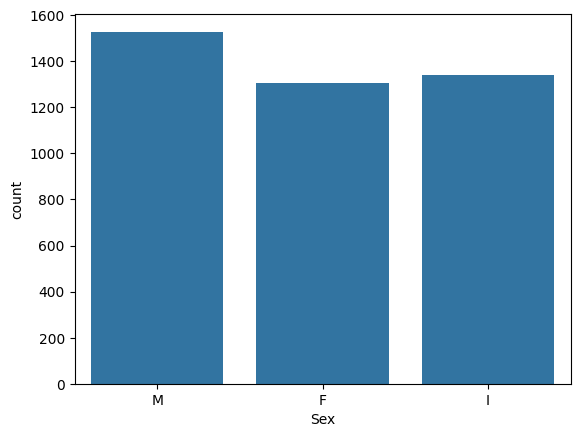

In [8]:

sns.countplot(data=dataset_abalone_original, x='Sex')

I was hoping to see if there is a gradual change and perhaps a pattern of straight line when the age increases and by the looks of it, it does. No matter the height, length, weight. It all increases in a predictable way which is useful to know. I do notice that some abalones made it to exceptional values with their physical traits. Since they are so unique, not many abalones will be like that. Which means that there isn't enough information on those specific abalones and they will act as noise to the models. So I need to go through each feature to get a closer look to make sure and cut out the values that will confuse the model.

<Figure size 2000x2000 with 0 Axes>

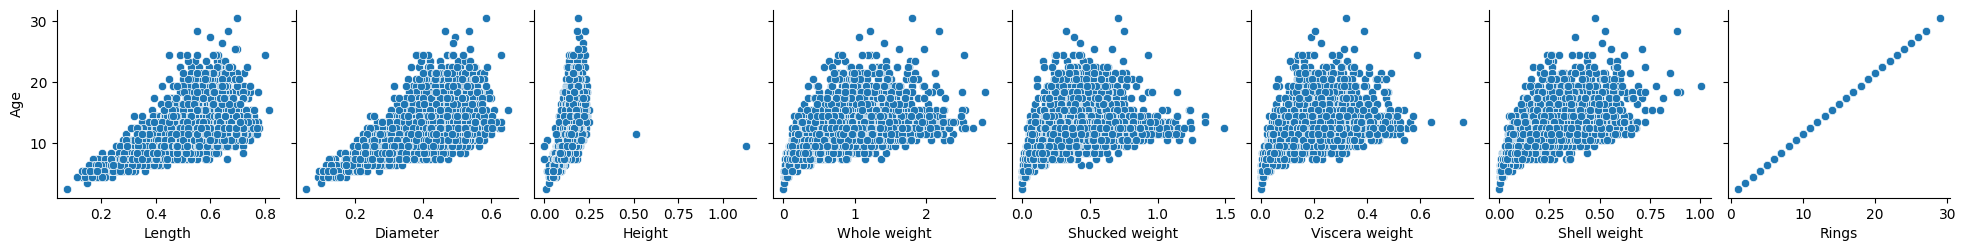

In [9]:
plt.figure(figsize=(20, 20))
sns.pairplot(dataset_abalone_original
                , x_vars=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
                , y_vars=['Age'])

plt.show()

Over here I was not looking for anything specific. I was hoping to see any more information by quickly checking all the feature combinations in the hopes of seeing patterns, noise, lines, irregular values, spikes. But there is nothing new or special going on. The most important was covered just now when we checked the differences of physical traits over time.

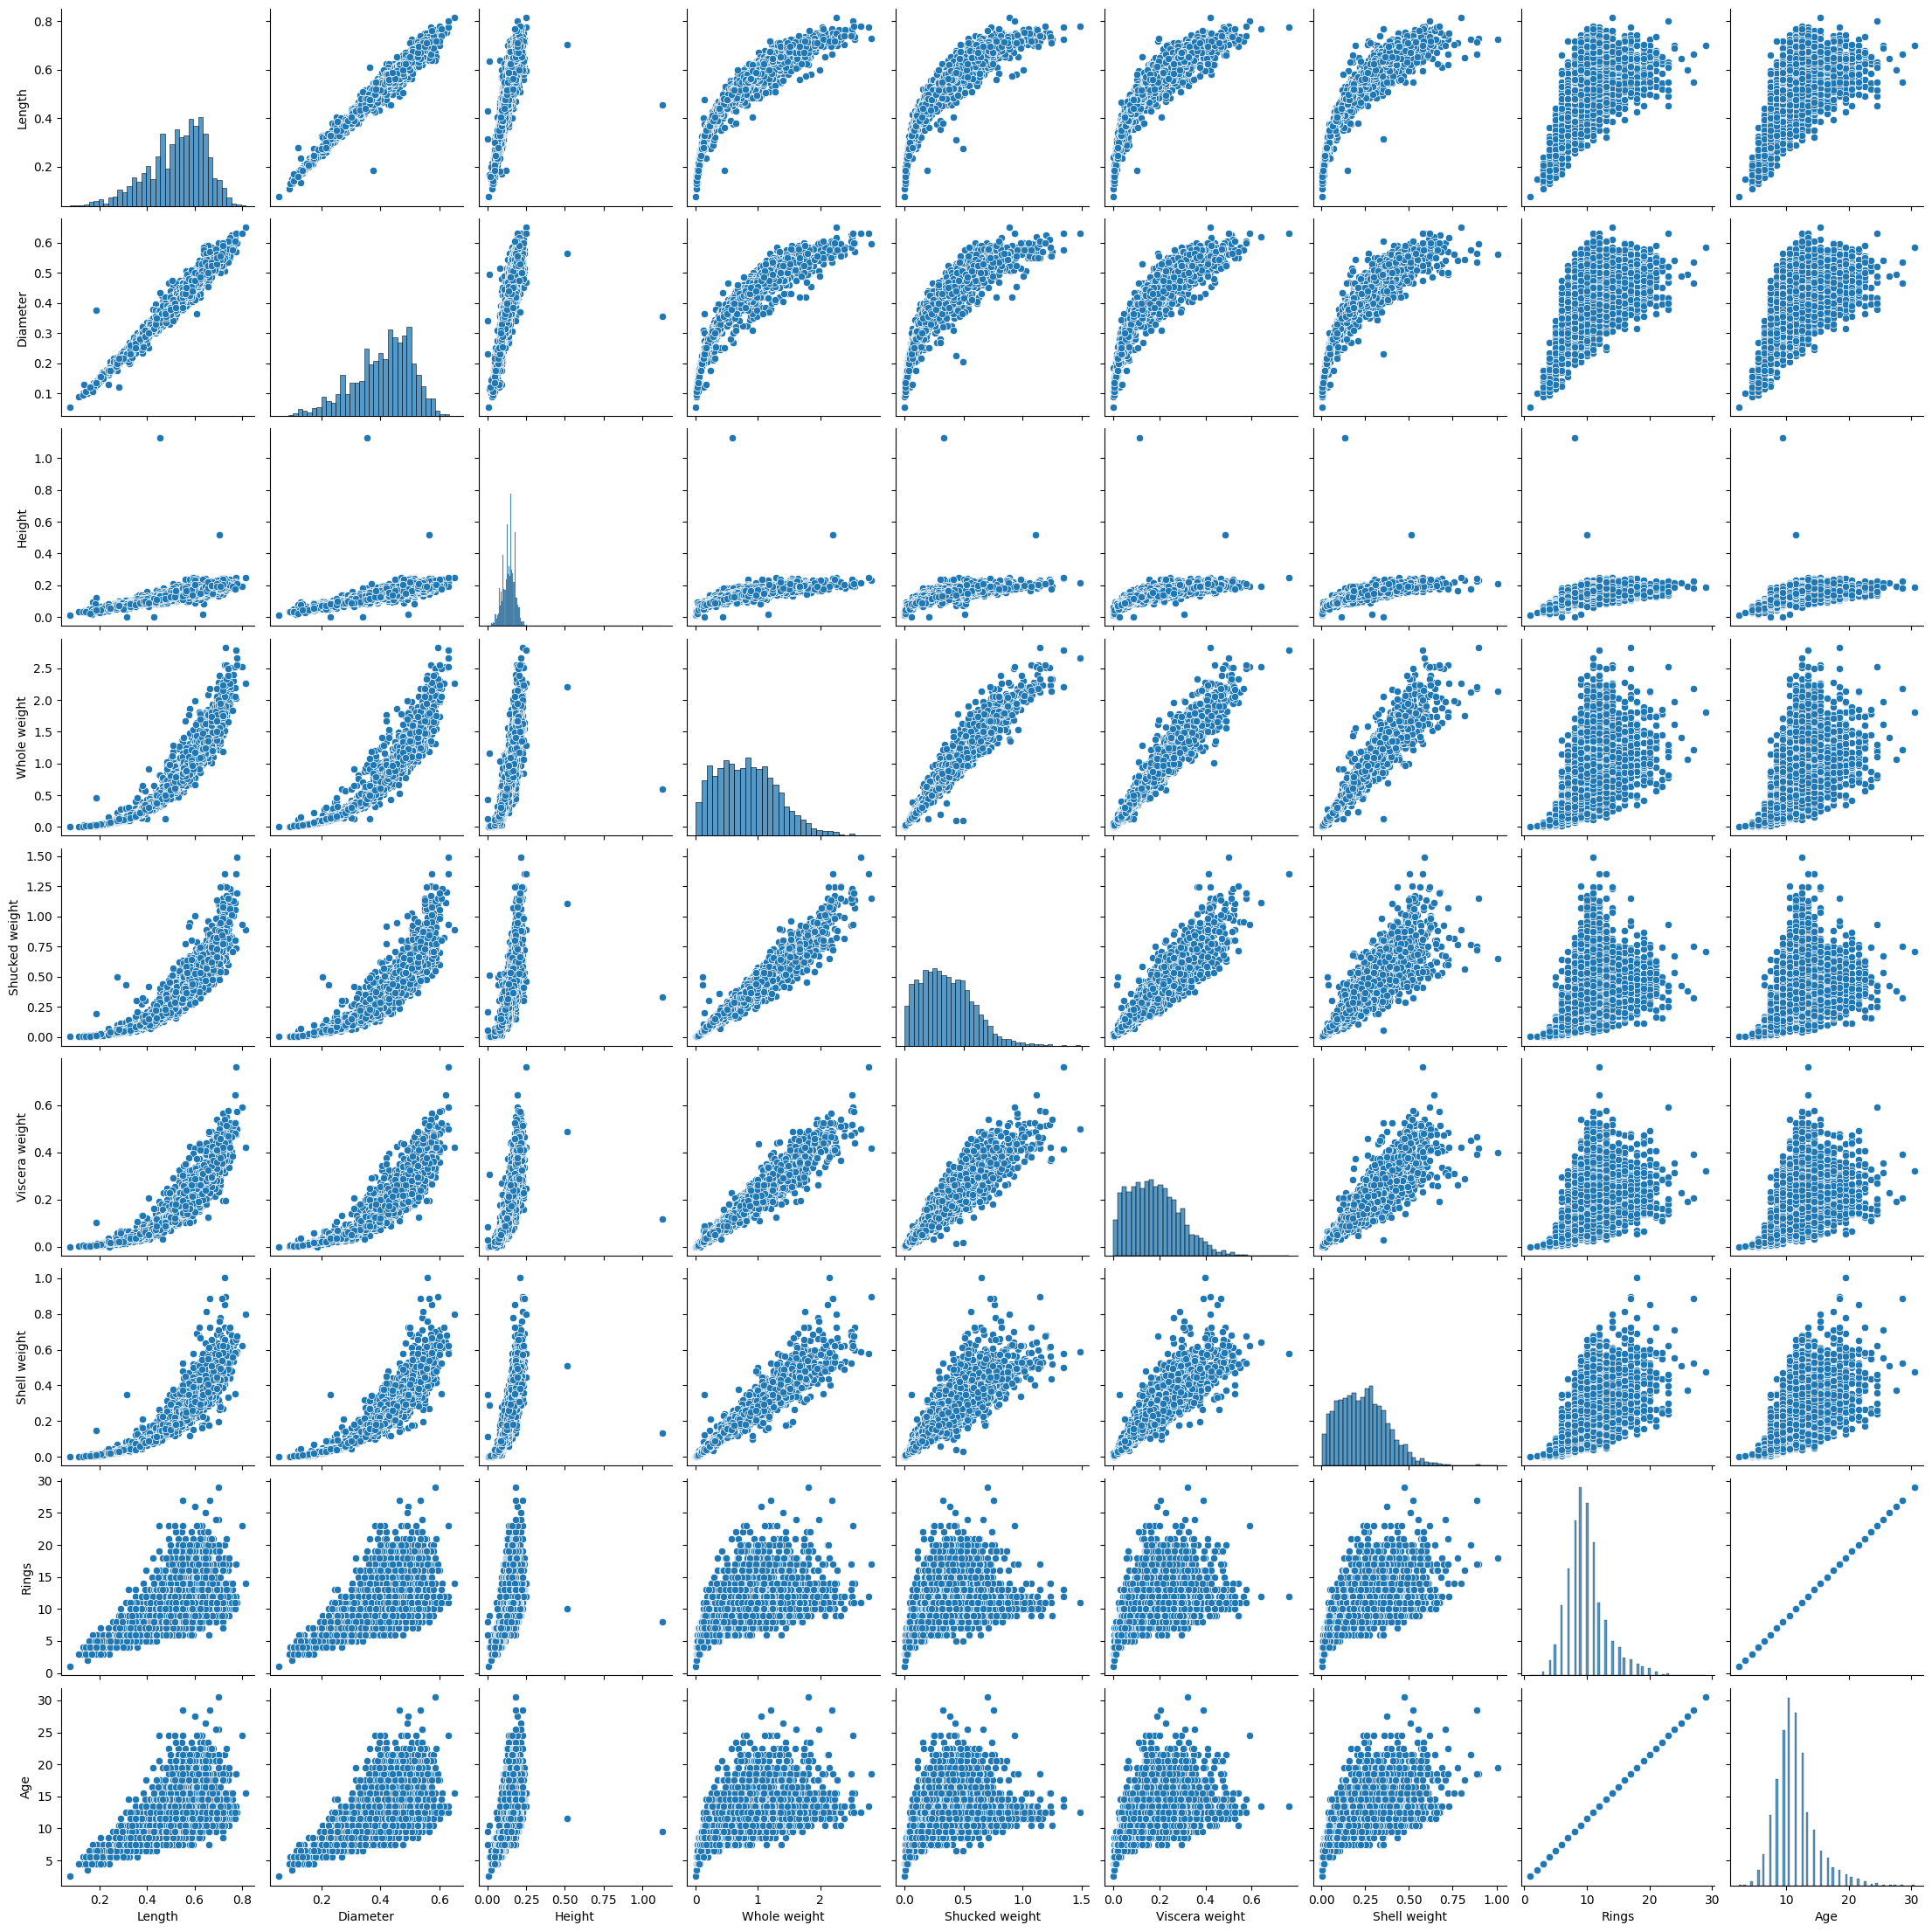

In [10]:
sns.pairplot(dataset_abalone_original)

By displaying the age we can see what the majorities age is which will help us understand certain things like knowing where certain spikes come from if it is related to age, we can easily track things like this when they start to grow slower or when the growing process slows down and in this case even determine when abalones start to die from natural causes. Somehow between the age of 15 and 20 a whole box is missing which is weird and interesting. This probably won't affect the models result by much but it does mean that we are missing a "step" in age. 

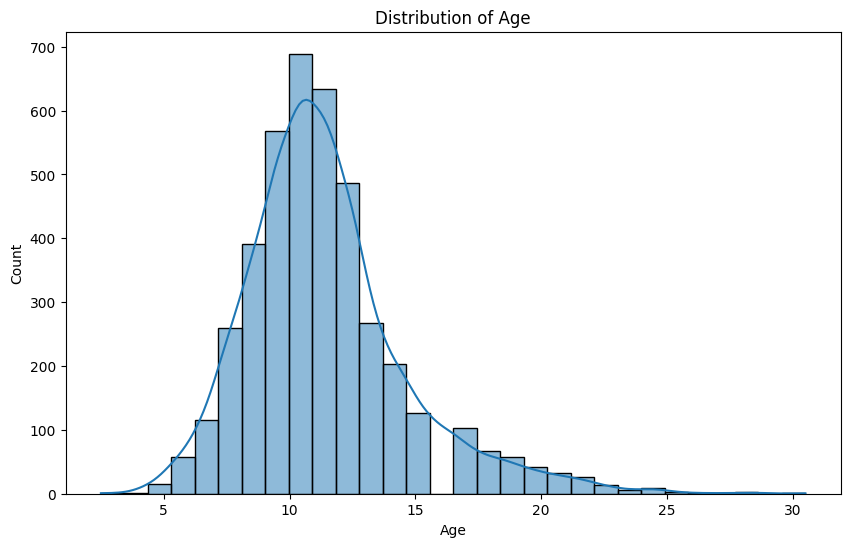

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset_abalone_original, x='Age', bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

Because we are checking age in the plot above, we are checking every value which always ends in a .5 because age is 1.5 on top of the amount of rings. So to make sense of the missing bar we will check if the same thing happens when we make the same plot for rings. When you look underneath we basically see the same shape and curves as when we check age, which makes sense since it is the same. But we also see the same missing bar. There should be no gap in there.

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset_abalone_original, x='Rings', bins=30, kde=True)
plt.xlabel('Rings')
plt.ylabel('Count')
plt.title('Distribution of Rings')

plt.show()

Underneath each age that is in the database is printed and next to it is the number of abalones with that age. What is weird is that when the ages are printed, we can see that the supposed to be missing age is actually shown underneath. This does confirm that nothing is missing but it is still odd why the graph did not show it. 

In [13]:
age_counts = dataset_abalone_original['Age'].value_counts().sort_index()
age_counts

Age
2.5       1
3.5       1
4.5      15
5.5      57
6.5     115
7.5     259
8.5     391
9.5     568
10.5    689
11.5    634
12.5    487
13.5    267
14.5    203
15.5    126
16.5    103
17.5     67
18.5     58
19.5     42
20.5     32
21.5     26
22.5     14
23.5      6
24.5      9
25.5      2
26.5      1
27.5      1
28.5      2
30.5      1
Name: count, dtype: int64

Even when we print out all the rings we can see that everything between 12 and 22 with a difference of 1 is there. meaning that the plot falsely shows a gap. Despite that, we can also confirm now that nothing is actually missing and that we don't have to worry about that. The age 28 isn't here but 29 is. But it won't bring any value to the end anyways since there is almost no information on abalones of ages older than 20. Despite that, it's good to know that a gap exist.

In [14]:
ring_counts = dataset_abalone_original['Rings'].value_counts().sort_index()
ring_counts

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64

Now we will make dummy values of the dataset and store it in another variable so we can easily call the original and unmodified dataset. The reason why we do this is because of the feature "Sex". Currently, that feature is a string. Models and the usage of plots only work with features that are numerical. The function "get_dummies" will do exactly that by turning any categorical information into numerical information. So the string will turn into a boolean and it will do that for each category that exists. in this case 3 values, infant, woman and man will turn into a numerical value where 0 stand for "this is not this category" and 1 stands for "this is this category".

In [15]:
dataset_abalone_dummies = pd.get_dummies(dataset_abalone_original)

We're calling the info function to make sure that the categories are actually changed into what we want, what the new feature names are and if the data type gets recognized correctly. in this case, it all gets recognized perfectly fine and the naming makes sense and is easy to remember. Now, some people like to remove at least one of these features with the logic like: "if infant and female is 0, then it must be a man". However I am keeping all the features so i can strictly point out what should be a 0 or 1. This won't matter if we pick method A or B. This is a matter of preference.

In [16]:
dataset_abalone_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
 8   Age             4177 non-null   float64
 9   Sex_F           4177 non-null   bool   
 10  Sex_I           4177 non-null   bool   
 11  Sex_M           4177 non-null   bool   
dtypes: bool(3), float64(8), int64(1)
memory usage: 306.1 KB


# KNN - before changing the data

Before we are changing the data, let's see what happens if we let the model use every feature except for the target. Just so we know where we stand with the unmodified dataset.

In [17]:
X  = dataset_abalone_dummies.drop(['Age', 'Rings'], axis=1)
Y = dataset_abalone_dummies['Age']

It is important to split the data into a set meant for training and a set meant for testing. Training is meant so the model got a chance to understand patterns, relations, behavior, etc. Test data is data the model does not know about and so it must try to predict as close as possible to the actual value. We will evaluate each attempt any model has to see what went well, what went wrong and if any changes we made to the model, hyperparameters or anything else affected the result.

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

For the sake of simplicity we will use KNN to see where we stand. It is easy to implement and give a quick assumption of things but we probably won't be using it after this. Maybe once after our first data modification just to see the difference in results. Normally I would scale the data before using the model, however the website where i got this dataset from mentioned it already scaled it. If it seems to be necessary we can always scale it later. For now, let's assume it is scaled correctly.

In [19]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, Y_train)
knn_regressor.fit(X_test, Y_test)
Y_pred = knn_regressor.predict(X_test)

Now these are the results. These numbers are not amazing and the model is far what we want. However, the fact that it is scoring far from the truth but not drastically far means that there is potential. That is what KNN now showed us. You will see these ratings a lot. R2 score shows how well the model is able to explain the features and logic. Mean Absolute Error (MAE) means the average predictions are off by the given score. in this case on average the predictions got a error of 1.35 (rounded the actual number). This doesn't sound like a lot since blacklip abalones, which is the abalone species of the dataset we have, are able to live to 50. However, like you might have noticed in the list of ages earlier. At the age of 9-10, less and less abalones live. And from age 11 the population drastically goes down. 

Now that the situation is known, let's get back to the last value we will see often in this notebook, mean squared error (MSE): Mse is the average squared difference between the predicted values and the actual values. Unlike MAE, this one penalizes larger errors due to the differences in square. What makes this one useful is that not only does it show the average error in square, but it also shows the understanding of the overall prediction quality. But the goal of MAE and MSE remain simple, get as close to 0 as possible.

In [20]:
print('R2 Score:', r2_score(Y_test, Y_pred))
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))

R2 Score: 0.647480734439071
Mean Absolute Error: 1.3523923444976076
Mean Squared Error: 3.828468899521531


# checking data correctness and dealing with outliers

Now the next pat will be long and repeating but so necessary. We are going through each feature more closely and cut out any outliers if there are any. In the first plot we can see some outliers. Like the only dot that goes above 30, or the one dot in the corner that is close to the age of 25 and close to the viscera weight of 0.6. It boils down to the following rule: if there are values that are exceptionally high or low. Remove them. Otherwise it would act up as noise.

While we're at it. Let's make sure that the values we see match the range as shown in the data dictionary.

Remember that the weight is in KG. It can be possible for newborn abalones to be less than a gram but they quickly rise above that. So don't let the decimals mislead you. The dataset site I got this from mentioned it is grams as well but by looking closer and reading more about them you quickly realize that the weight does not match up the dataset while in kg they do. Remember, this dataset is about wild abalones. Farmed abalones are on average smaller. Also, this dataset will most likely be far from the max range due to the fact that we don't got abalones older than 30. they can be up to 50 in the wild.

In [21]:
dataset_abalone_original.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings          Age  
count     4177.000000   4177.000000  4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684    11.433684  
std          0.109614      0.139203     3.224169     3.224169  
min          0.000500      0.001500     1.000000     2.500000  
25%          0.093500      0.130000     8.000000     9.500000  
50%          0.171000      0.234000     9.000000    10.500000  
75%          0.253000      0.329000    11.000000    12.500000  
max          0.760000      1.005000    29.000000    30.500000

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(data=dataset_abalone_dummies, x='Viscera weight', y='Age')
plt.xlabel('Viscera weight')
plt.ylabel('Age')
plt.title('Distribution of Viscera weight per Age')
plt.grid()
plt.show()

After we spot the outliers we will remove them by specifying the range they are in. For example. there is only 1 abalone of age 30 and up. So I make sure that I remove everything that comes down to that specific range making sure that I do not drop anything else by accident.

In [23]:
dataset_abalone_dummies.drop(dataset_abalone_dummies[(dataset_abalone_dummies['Viscera weight'] > 0.5) & (dataset_abalone_dummies['Age'] < 20)].index, inplace = True)

dataset_abalone_dummies.drop(dataset_abalone_dummies[(dataset_abalone_dummies['Viscera weight'] > 0.5)].index, inplace = True)

dataset_abalone_dummies.drop(dataset_abalone_dummies[(dataset_abalone_dummies['Viscera weight'] < 0.5) & (dataset_abalone_dummies['Age'] > 30)].index, inplace = True)

Now with the plot underneath we can confirm if what we wanted to go is gone, if any other outliers still remain and if we didn't remove anything else by accident. But it looks like we kept the shape we wanted and so we can move on with the information we want. Now this process will from now on repeat for each feature so there won't be much said till we are done.

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(data=dataset_abalone_dummies, x='Viscera weight', y='Age')
plt.xlabel('Viscera weight')
plt.ylabel('Age')
plt.title('Distribution of Viscera weight per Age')
plt.grid()
plt.show()

In [25]:
plt.scatter(data=dataset_abalone_dummies, x='Shell weight', y='Age')
plt.xlabel('Shell weight')
plt.ylabel('Age')
plt.title('Distribution of Shell weight per Age')
plt.grid()
plt.show()

In [26]:

dataset_abalone_dummies.drop(dataset_abalone_dummies[(dataset_abalone_dummies['Shell weight'] > 0.6) & (dataset_abalone_dummies['Age'] < 25)].index, inplace = True)
dataset_abalone_dummies.drop(dataset_abalone_dummies[(dataset_abalone_dummies['Shell weight'] > 0.8) & (dataset_abalone_dummies['Age'] > 25)].index, inplace = True)
dataset_abalone_dummies.drop(dataset_abalone_dummies[(dataset_abalone_dummies['Shell weight'] < 0.8) & (dataset_abalone_dummies['Age'] > 25)].index, inplace = True)

It can be hard to decide when something should or shouldn't stay. However sometimes it can happen that you got data like this. Where a value is either a rare exception or perhaps even a mistake while nothing the numbers. Remember, all this data is written down by humans. Mistakes can be made so keep in mind that the data is not perfect.

In [27]:
plt.scatter(data=dataset_abalone_dummies, x='Shell weight', y='Age')
plt.xlabel('Shell weight')
plt.ylabel('Age')
plt.title('Distribution of Shell weight per Age')
plt.grid()
plt.show()

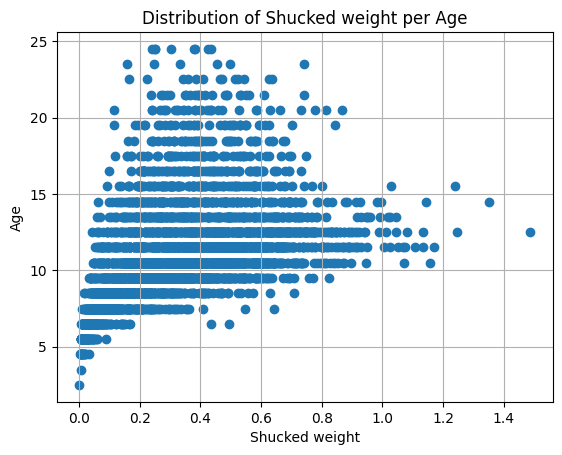

In [28]:
plt.scatter(data=dataset_abalone_dummies, x='Shucked weight', y='Age')
plt.xlabel('Shucked weight')
plt.ylabel('Age')
plt.title('Distribution of Shucked weight per Age')
plt.grid()
plt.show()

In [29]:
dataset_abalone_dummies.drop(dataset_abalone_dummies[(dataset_abalone_dummies['Shucked weight'] >= 1) &(dataset_abalone_dummies['Age'] < 20)].index, inplace = True)

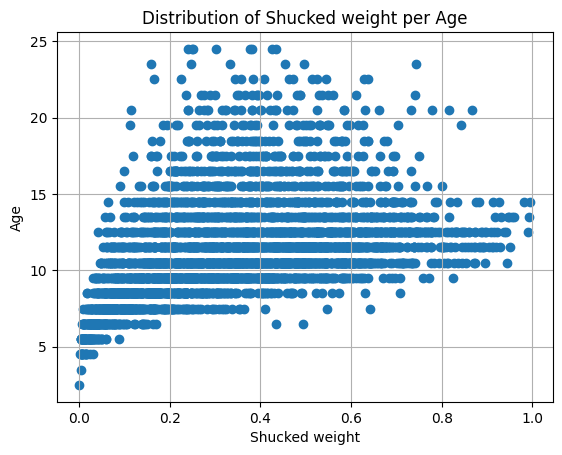

In [30]:
plt.scatter(data=dataset_abalone_dummies, x='Shucked weight', y='Age')
plt.xlabel('Shucked weight')
plt.ylabel('Age')
plt.title('Distribution of Shucked weight per Age')
plt.grid()
plt.show()

In [31]:
plt.scatter(data=dataset_abalone_dummies, x='Whole weight', y='Age')
plt.xlabel('Whole weight')
plt.ylabel('Age')
plt.title('Distribution of Whole weight per Age')
plt.grid()
plt.show()

In [32]:
dataset_abalone_dummies.drop(dataset_abalone_dummies[(dataset_abalone_dummies['Whole weight'] > 2) &(dataset_abalone_dummies['Age'] < 25)].index, inplace = True)

dataset_abalone_dummies.drop(dataset_abalone_dummies[(dataset_abalone_dummies['Whole weight'] < 2.5) & (dataset_abalone_dummies['Age'] > 25)].index, inplace = True)

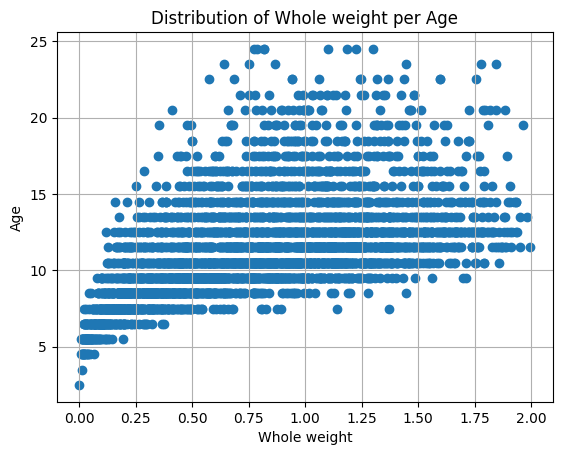

In [33]:
plt.scatter(data=dataset_abalone_dummies, x='Whole weight', y='Age')
plt.xlabel('Whole weight')
plt.ylabel('Age')
plt.title('Distribution of Whole weight per Age')
plt.grid()
plt.show()

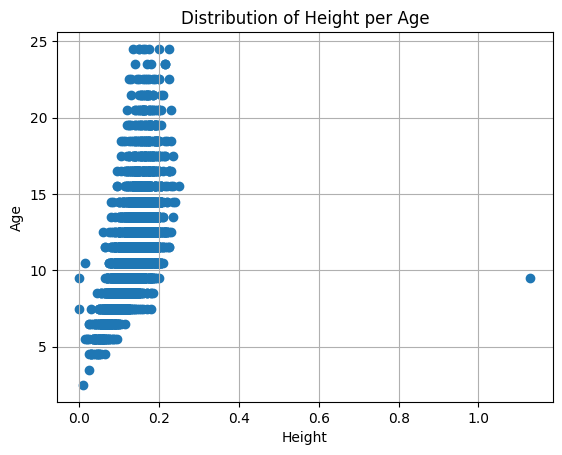

In [34]:
plt.scatter(data=dataset_abalone_dummies, x='Height', y='Age')
plt.xlabel('Height')
plt.ylabel('Age')
plt.title('Distribution of Height per Age')
plt.grid()
plt.show()

In [35]:

dataset_abalone_dummies.drop(dataset_abalone_dummies[(dataset_abalone_dummies['Height'] > 0.4) & (dataset_abalone_dummies['Age'] < 15)].index, inplace = True)

dataset_abalone_dummies.drop(dataset_abalone_dummies[(dataset_abalone_dummies['Height'] < 0.4) &(dataset_abalone_dummies['Age'] > 25)].index, inplace = True)

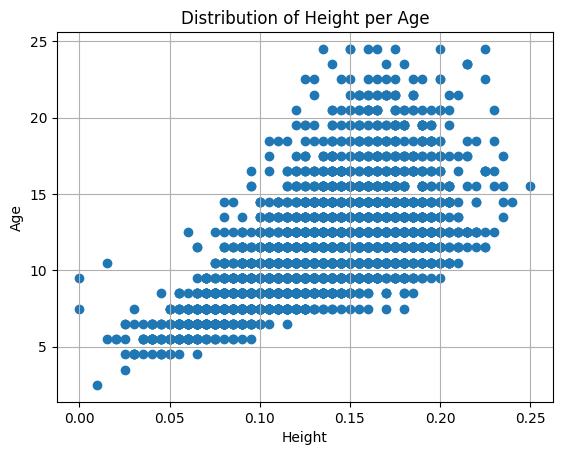

In [36]:
plt.scatter(data=dataset_abalone_dummies, x='Height', y='Age')
plt.xlabel('Height')
plt.ylabel('Age')
plt.title('Distribution of Height per Age')
plt.grid()
plt.show()

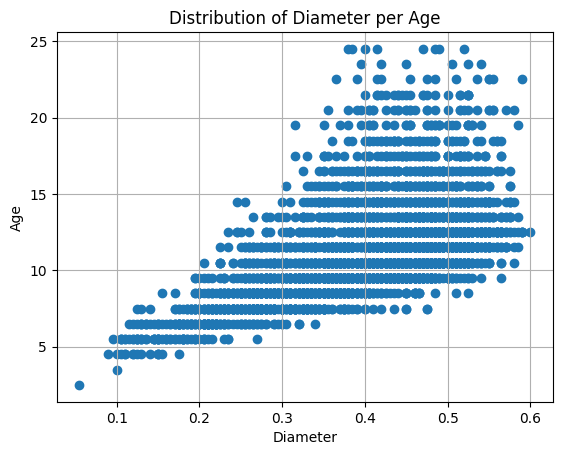

In [37]:
plt.scatter(data=dataset_abalone_dummies, x='Diameter', y='Age')
plt.xlabel('Diameter')
plt.ylabel('Age')
plt.title('Distribution of Diameter per Age')
plt.grid()
plt.show()

In [38]:
dataset_abalone_dummies.drop(dataset_abalone_dummies[(dataset_abalone_dummies['Diameter'] < 0.1) &(dataset_abalone_dummies['Age'] < 5)].index, inplace = True)


dataset_abalone_dummies.drop(dataset_abalone_dummies[(dataset_abalone_dummies['Diameter'] < 0.6) & (dataset_abalone_dummies['Age'] > 25)].index, inplace = True)

dataset_abalone_dummies.drop(dataset_abalone_dummies[(dataset_abalone_dummies['Diameter'] >= 0.6) & (dataset_abalone_dummies['Age'] > 25)].index, inplace = True)

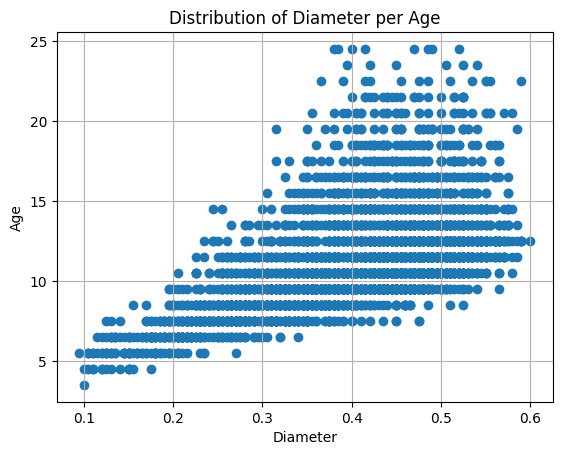

In [39]:
plt.scatter(data=dataset_abalone_dummies, x='Diameter', y='Age')
plt.xlabel('Diameter')
plt.ylabel('Age')
plt.title('Distribution of Diameter per Age')
plt.grid()
plt.show()

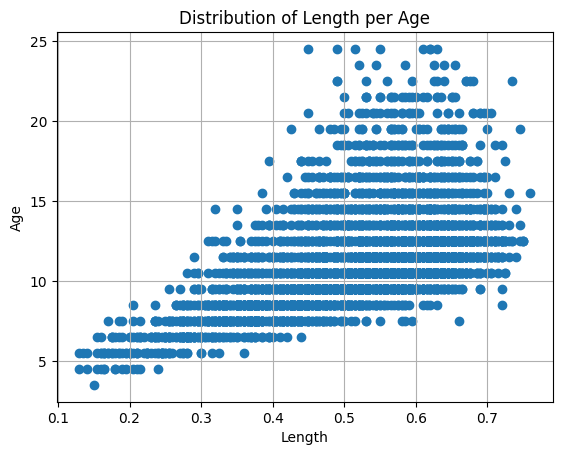

In [40]:
plt.scatter(data=dataset_abalone_dummies, x='Length', y='Age')
plt.xlabel('Length')
plt.ylabel('Age')
plt.title('Distribution of Length per Age')
plt.grid()
plt.show()

In [41]:
dataset_abalone_dummies.drop(dataset_abalone_dummies[(dataset_abalone_dummies['Length'] < 0.1) &(dataset_abalone_dummies['Age'] < 5)].index, inplace = True)

dataset_abalone_dummies.drop(dataset_abalone_dummies[(dataset_abalone_dummies['Length'] < 0.8) & (dataset_abalone_dummies['Age'] > 25)].index, inplace = True)

dataset_abalone_dummies.drop(dataset_abalone_dummies[(dataset_abalone_dummies['Length'] >= 0.8) & (dataset_abalone_dummies['Age'] < 25)].index, inplace = True)

dataset_cutout = dataset_abalone_dummies

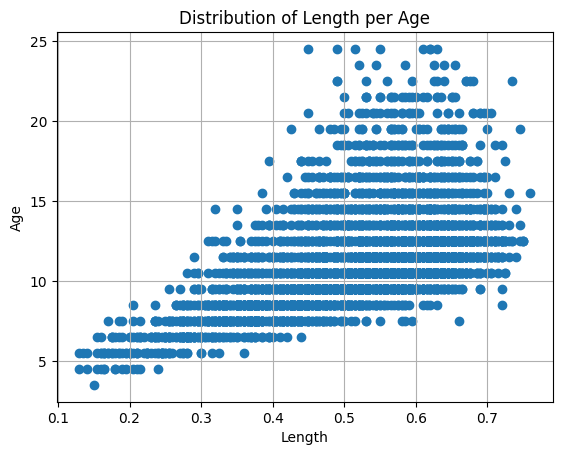

In [42]:
plt.scatter(data=dataset_abalone_dummies, x='Length', y='Age')
plt.xlabel('Length')
plt.ylabel('Age')
plt.title('Distribution of Length per Age')
plt.grid()
plt.show()

Now after we finally checked if the data is realistic and changed every feature where needed. We can now check how the models react to this. We will try out a few promising models and see if we see something have a exceptional score. If we found a promising model we will work it out from there on out. For now, let's set the feature and target up once again. Put the scaler through, split the data and test it once again on KNN. Now I mentioned that we won't be using this, but for the sake of seeing our affect on the score since we already know how KNN scored before we made any changes. Let's see if we are going in the right direction or not.

In [43]:
X  = dataset_abalone_dummies.drop(['Age', 'Rings'], axis=1)
y = dataset_abalone_dummies['Age']

In [44]:
StandardScaler = StandardScaler()
X = StandardScaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bestK = SelectKBest(k=5)
alt_X = bestK.fit_transform(X, y)

# Testing models - after changing data

# KNN 

Let's make sure we set up the model the same way as we did before so that the scores are something we can compare with the 1st attempt.

In [45]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)

knn_regressor.fit(X_train, y_train)

knn_regressor.fit(X_test, y_test)

KNeighborsRegressor()

In [46]:
y_pred_train = knn_regressor.predict(X_test)
y_pred_test = knn_regressor.predict(X_test)

As before, we are printing out the test result only. Because the test result shows how well the model did with unseen data. And something interesting happens. The R2 and MSE improved slightly. Once again, we are far off from what we want but we are going in the right direction. We still got a lot of options to handle this better. Choose a more suited model, tune the parameters to fit the dataset better, boost it, make new features, try out different feature combinations. As you can see, there is a lot to try and combine. This is the first step of many for improvement and we currently did that to cut out anything that can cause noise.

In [47]:
print('R2 Score:', r2_score(y_test, y_pred_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_test))

R2 Score: 0.6527526515359674
Mean Absolute Error: 1.3525798525798525
Mean Squared Error: 3.7764619164619164


Now to get a better insight on what is happening, we can check this list where we can see what the model predicted, what the value is and how far it was off. It can not only tell us how it did per attempt. But we might be able to see anything interesting that can aid us further. Maybe the model doesn't do well with abalones with the age of 18 and above, perhaps the errors are only negatives, perhaps the error all got the same kind of number.

Now what we can see here now is that the model is able to make mistakes and is able to predict correctly. WE can also see that a good amount or errors aren't that far off. While some errors are off far from the average. We can see here now that if there are errors, it always seems to be dividable by 5. That can be explained. we set the n_neighbors parameter to 5. Meaning that 5 imaginary people have to vote for a prediction. or in other words, each vote is 20% influence on the resulted prediction. So that is why the numbers end in 0.2 or 0.4 for example. Basically, steps of 0.2. This of course can be changed by setting the hyperparameter to a higher number, which will also provide most likely a more accurate prediction. We will leave KNN now since we got our answer and need to find more fitted models. But at least the situation is clear and we got our answers from if our changes had a impact.

In [48]:
predictions = knn_regressor.predict(X_test)

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = prediction_overview["error"]
prediction_overview = prediction_overview.reset_index(drop=True)
print(prediction_overview)

     truth  prediction  error
0     11.5        12.1   -0.6
1     12.5        11.7    0.8
2     12.5        13.5   -1.0
3      9.5         9.9   -0.4
4     20.5        13.3    7.2
..     ...         ...    ...
809   12.5        12.5    0.0
810   23.5        15.7    7.8
811    9.5        11.1   -1.6
812   12.5        11.1    1.4
813    8.5         8.5    0.0

[814 rows x 3 columns]


Now we don't always want to check every single row 1 by 1. So we can make a scatterplot where we can see how close the dots are to a error of 0. If the area close to 0 becomes more dense it means that there are mostly no or low errors. We can see that the dots are gathering closely to 0 which is great. But it also shows that plenty of errors still exist. The majority of errors are 2. either in the negative or positive. But we can also see that a good chunk of the data is having a error far above 2. Let's see if any other model can fix that.

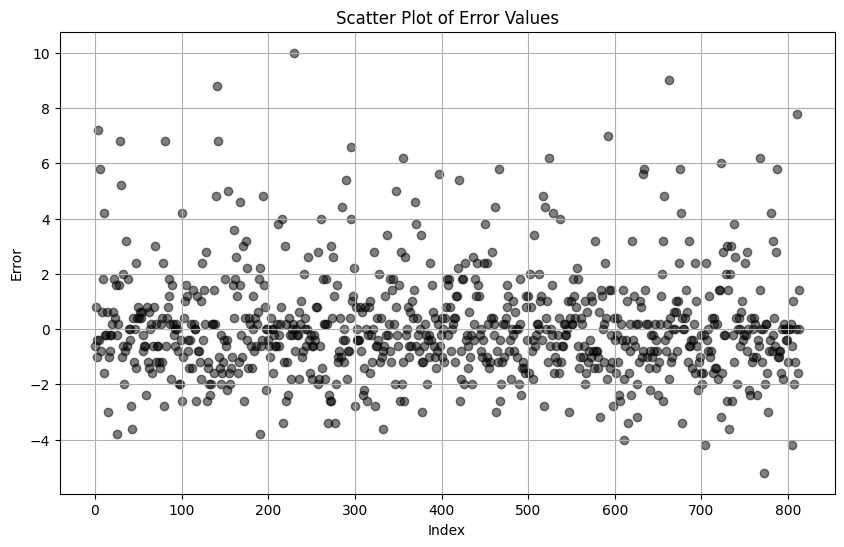

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(prediction_overview['error'])), prediction_overview['error'], color='black', alpha=0.50)
plt.title('Scatter Plot of Error Values')
plt.xlabel('Index')
plt.ylabel('Error')

plt.grid(True)
plt.show()

# SVR

Let's try out a support vector machine regression next. It is a flexible machine learning model that can adapt well to different datasets. It works by searching for a function that estimates the pattern of the data within a certain margin of tolerance. Meaning it can possibly figure out the complexity and patterns of the dataset with little to no input from me. And if it is going well enough we can always tune the hyperparameters. Up next we are preparing and setting up the model as usual.

In [50]:
svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)
svr.fit(X_test, y_test)

SVR(kernel='linear')

In [51]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

The scores didn't improve unfortunately It is in the same area compared to the previous model but it is still notably worse. However, the scores still show that there is potential. Despite the bad performance now, I do believe that SVR is a strong candidate for this dataset. With enough tweaking I am certain that SVR is able to perform well enough that the majority of abalones predictions will be close to a error of 0 meaning it can be useful. In case the other models aren't performing any better, I will go back to the original data and see how the SVR works with that and then move from there on out for improvement.

In [52]:
print('R2 Score:', r2_score(y_test, y_test_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_test_pred))

R2 Score: 0.5460837107371765
Mean Absolute Error: 1.5369472833257671
Mean Squared Error: 4.936531804332318


So by scrolling and keeping a eye out for high errors I can see that the model struggles mostly with ages that there are so few off.at the age of 12-13 you can see that the errors are becoming higher on average. And when we look at 15 or older the errors are in almost all cases incredibly high. errors of 4 and 6 are seen more often and it only get worse when we check more on older abalones. However, in most cases the age prediction of abalones of 12 year and younger are doing much better. There are errors of 2 with abalones of age 12 and younger but i see plenty of cases where a error of 0.8 till 1.5 comes in more often. Or in other words, the model is doing much better compared to the given MSE and MAE average when it comes to abalone with the age that there are many of. Despite the result we just got, at least now it is clear with what the model struggles with the most.

In [53]:
predictions = svr.predict(X_test)

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = prediction_overview["error"]
prediction_overview = prediction_overview.reset_index(drop=True)
print(prediction_overview)

     truth  prediction     error
0     11.5   10.365500  1.134500
1     12.5   10.225063  2.274937
2     12.5   11.668663  0.831337
3      9.5    9.639632 -0.139632
4     20.5   13.986869  6.513131
..     ...         ...       ...
809   12.5   13.002630 -0.502630
810   23.5   16.618070  6.881930
811    9.5   11.158425 -1.658425
812   12.5   10.586983  1.913017
813    8.5    8.320968  0.179032

[814 rows x 3 columns]


The visualization of the prediction overview look very similar the previous plot. If it wasn't for the R2, MAE and MSE that we printed out it would have been hard to tell if it was going better or not. For now there is no information I can get out of here.

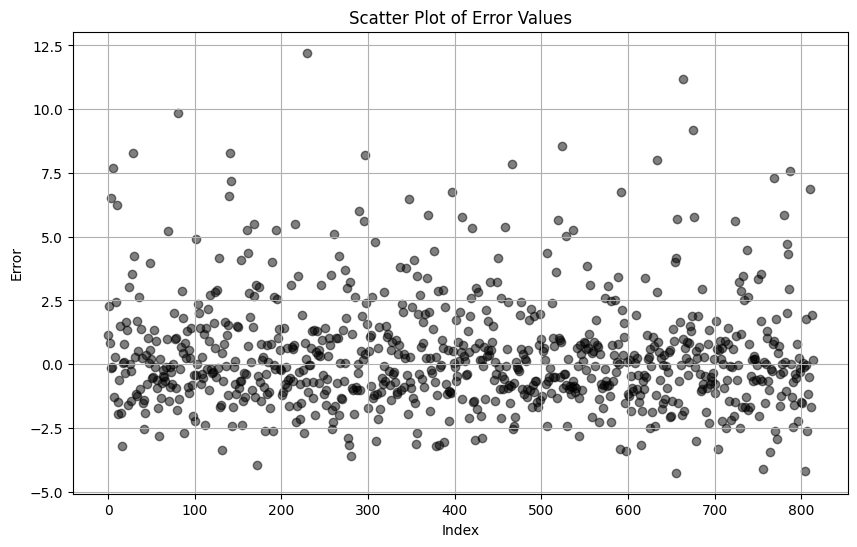

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(prediction_overview['error'])), prediction_overview['error'], color='black', alpha=0.50)
plt.title('Scatter Plot of Error Values')
plt.xlabel('Index')
plt.ylabel('Error')

plt.grid(True)
plt.show()

Now let's check the feature importance. We start doing this now because we weren't going to use KNN, the model used earlier. So it really wouldn't have mattered how KNN uses it. Now we can see that everyone got a influence on the end result. But it mostly comes down to weight. Whole weight makes sense to use since you can put a abalone on a scale. However, every other weight can only be obtained after the the abalone died. Shucked weight is just the meat weight meaning you have to detach it from the shell, viscera weight is the gut weight after bleeding, shell weight is the weight of the shell after it dried. The model must be able to predict a abalone age just from the measurement of the abalone while alive. So while weight, height, diameter, length and sex if proven useful are all features that we can use knowing that the abalone is alive. Like mentioned earlier, I want to see how the model respond to my modified data, but after we have chosen our model, we need to make sure that we get rid of every type of weight except whole weight in order for the model to work and think the way we want to.

However, it is possible to predict the viscera, shucked and shell weight of an abalone based on the whole weight. By using the data of the dataset it is possible to get a close prediction of these weight with the following formulas. Remember that shell, viscera and shucked weight are generally known to go through a process before actually weighing. Like mentioned earlier, shell weight is the weight of the shell after it is dried while viscera weight is the gut weight after bleeding. Now as mentioned in the research, shell weight is approximately 10 to 20 percent of the whole weight while viscera weight can make up to to 15 till 30% of the weight.

Now shucked weight are the majority of a abalones weight and can easily make up more than 50% of the weight depending on it's size. In most cases it makes up 50 to 60 percents of the weight when talking about this specific species. Gut and shell weight grow in relation to the abalone itself, but the age progress slows down at a certain age.

Now for the formulas, let's pick all the weights in the middle. So shell weight is making up 15% of the whole weight, viscera weight makes up 22.5% of the whole weight while shucked weight makes up 55% of the whole weight. Just like in they did it in the research. which means on average there is 7,5% room for moisture and blood if we don't count pearls. Pearls can be produced but abalone rarely do that. If it happens than it is happening because of a disturbance in the intestines or shell.

Despite not being accurate to the smallest detail, this is how it got processed after the research team decided not to slice open the abalone. Meaning that the dataset is not improving nor failing in the quality of the dataset we currently have.

shucked weight = (whole weight / 100) * 55

viscera weight = (whole weight / 100) * 22.5

shell weight = (whole weight / 100) * 15

Normally I wouldn't want to use the data on average since the original plan is to use physical measurements for the prediction. However I am fairly certain that the model would need this since it already hasn't too much to go off to. If we remove these 3 features the model can make less accurate predictions. But with these given numbers from the report we at least know that we keep true to the dataset and the way some measurement are recorded.

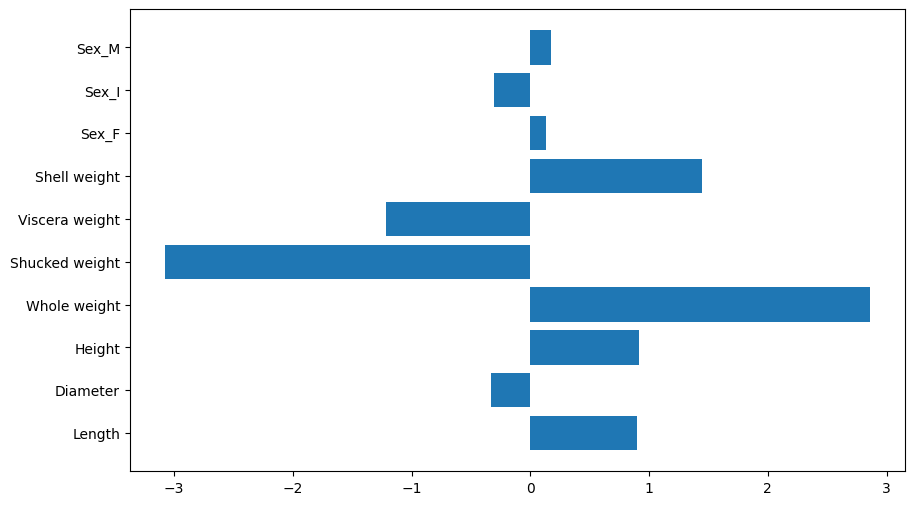

In [55]:
feature_importance = svr.coef_[0]
column_names = dataset_abalone_dummies.drop(['Age', 'Rings'], axis=1).columns

plt.figure(figsize=(10, 6))
plt.barh(column_names, feature_importance)

plt.show()

# Linear regression

Since the abalone data got plenty of linear features and the underlying pattern aren't that complex. It might be a good idea to give a shot with linear regression. This model is suitable for certain aspects for sure. However, the downside is that it is limited to linear relations and that it is incredibly sensitive to outliers. So despite the simplicity of making the model, we need to evaluate the result to make sure the model was set in a proper environment. 

In [56]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred_train = linear_regression.predict(X_train)
y_pred_test = linear_regression.predict(X_test)

This time we are checking the train and test data. I learned that it can help with several things. We can see if the train and test result differ from each other and by how much. if it does perfect on train data but incredibly poor on test we can detect things like data leakage. It can also help show if the model is under or overfit, But of course, it also helps us confirm if the generalization of data is fine. Now looking at the score underneath we can see that the MAE is roughly the same but a slight improvement is seen on MSE. The model doesn't seem to be better or worse than the last. Meaning it could possibly be of use if we tweak it correctly. But since it is so sensitive and it doesn't do well with anything non-linear i might leave this one, the other models we are trying out are more flexible while having similar score meaning I got more freedom and possibilities on how to approach this problem and steps to improvement.

In [58]:
print('Mean Squared Error Training: ', mean_squared_error(y_train, y_pred_train))
print('Mean Squared Error Testing: ', mean_squared_error(y_test, y_pred_test))

Mean Squared Error Training:  4.420970846698964
Mean Squared Error Testing:  4.829308805592363


In [59]:

print('Mean Absolute Error Training: ', mean_absolute_error(y_train, y_pred_train))
print('Mean Absolute Error Testing: ', mean_absolute_error(y_test, y_pred_test))

Mean Absolute Error Training:  1.5336289635577467
Mean Absolute Error Testing:  1.564462331867943


In [60]:

print('R2 Score Training: ', r2_score(y_train, y_pred_train))
print('R2 Score Testing: ', r2_score(y_test, y_pred_test))

R2 Score Training:  0.5309514126372077
R2 Score Testing:  0.5559429130356323


In [61]:

print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_test)))


Root Mean Squared Error: 2.1975688397846294


Just like the previous one, the model seem to be doing worse when it gets to older abalones. But we already know that is because there are so little abalones to get data from when we talk about older abalones.

In [62]:
predictions = linear_regression.predict(X_test)

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = prediction_overview["error"]
prediction_overview = prediction_overview.reset_index(drop=True)
print(prediction_overview)

     truth  prediction     error
0     11.5   10.681842  0.818158
1     12.5    9.619517  2.880483
2     12.5   11.782320  0.717680
3      9.5    9.943008 -0.443008
4     20.5   14.729026  5.770974
..     ...         ...       ...
809   12.5   13.511594 -1.011594
810   23.5   17.436907  6.063093
811    9.5   10.966667 -1.466667
812   12.5   10.830833  1.669167
813    8.5    8.725164 -0.225164

[814 rows x 3 columns]


Very similar compared to the last result. But the scores came close to each other so it makes sense that it is similar.

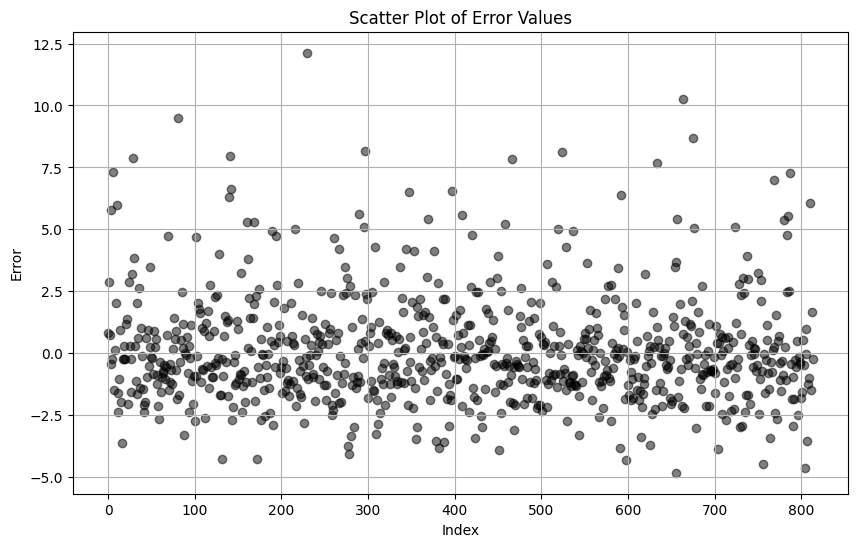

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(prediction_overview['error'])), prediction_overview['error'], color='black', alpha=0.50)
plt.title('Scatter Plot of Error Values')
plt.xlabel('Index')
plt.ylabel('Error')

plt.grid(True)
plt.show()

Very similar use and impact of the feature. The main difference is that shell weight impact seem to be less by 1/3 here compared to the last model. Shucked weight is close or at -4 while in the previous model that was around -3. Whole weight is close to 4 while before it was close to 3. Diameter went from being a bit below 0 to surpassing 1. Length actually went from being close to 1 to -1. It looks like the model are thinking almost the same but make different choices on the detail which is why there are a few noticeable changes.

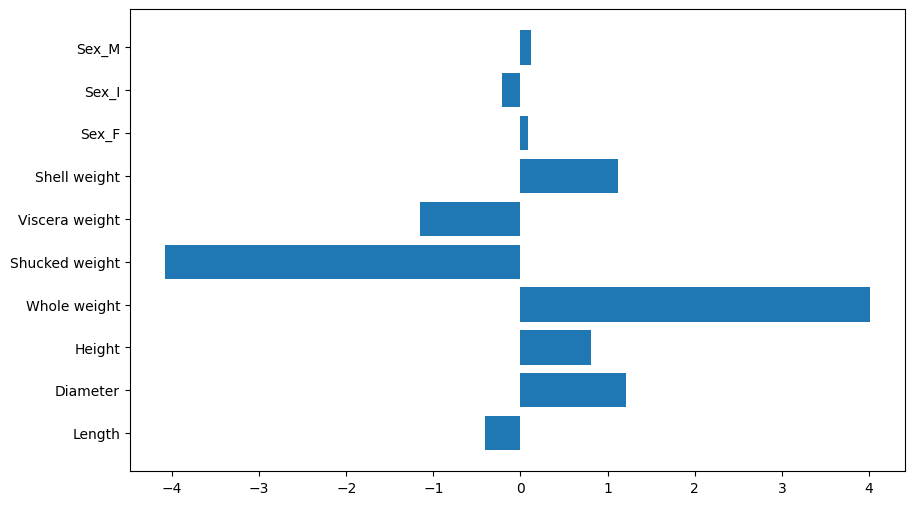

In [64]:
feature_importance = linear_regression.coef_
column_names = dataset_abalone_dummies.drop(['Age', 'Rings'], axis=1).columns

plt.figure(figsize=(10, 6))
plt.barh(column_names, feature_importance)

plt.show()

# Random Forest

Let's try out how a random forest regressor works out. It is a model that is based on multiple decision trees. Hence the word "forest" in the name. The advantages of random forest is that it can both be used for regressions and classifications, it doesn't overfit and it can handle all sizes of datasets performance wise. So a model this flexible is good to try out.

In [65]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [66]:
y_pred_train = random_forest.predict(X_train)
y_pred_test = random_forest.predict(X_test)

Well this model is also in the same range as the other ones. Some are slightly better or worse. But it looks like that the models are all resulting around the same area. Meaning that tweaking is necessary with whatever model I choose next. The interesting thing is that random forest seems to do really well with training set 

In [67]:
print('Mean Squared Error Training: ', mean_squared_error(y_train, y_pred_train))
print('Mean Squared Error Testing: ', mean_squared_error(y_test, y_pred_test))

print('Mean Absolute Error Training: ', mean_absolute_error(y_train, y_pred_train))
print('Mean Absolute Error Testing: ', mean_absolute_error(y_test, y_pred_test))

print('R2 Score Training: ', r2_score(y_train, y_pred_train))
print('R2 Score Testing: ', r2_score(y_test, y_pred_test))

print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_test)))


Mean Squared Error Training:  0.619177886977887
Mean Squared Error Testing:  4.658245945945946
Mean Absolute Error Training:  0.5622604422604423
Mean Absolute Error Testing:  1.526879606879607
R2 Score Training:  0.9343075258163918
R2 Score Testing:  0.5716722188639152
Root Mean Squared Error: 2.1582970013290446


In [68]:
predictions = random_forest.predict(X_test)

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = prediction_overview["error"]
prediction_overview = prediction_overview.reset_index(drop=True)
print(prediction_overview)

     truth  prediction  error
0     11.5       11.99  -0.49
1     12.5       12.02   0.48
2     12.5       11.89   0.61
3      9.5        9.09   0.41
4     20.5       15.56   4.94
..     ...         ...    ...
809   12.5       13.36  -0.86
810   23.5       17.06   6.44
811    9.5       11.88  -2.38
812   12.5       11.08   1.42
813    8.5        7.87   0.63

[814 rows x 3 columns]


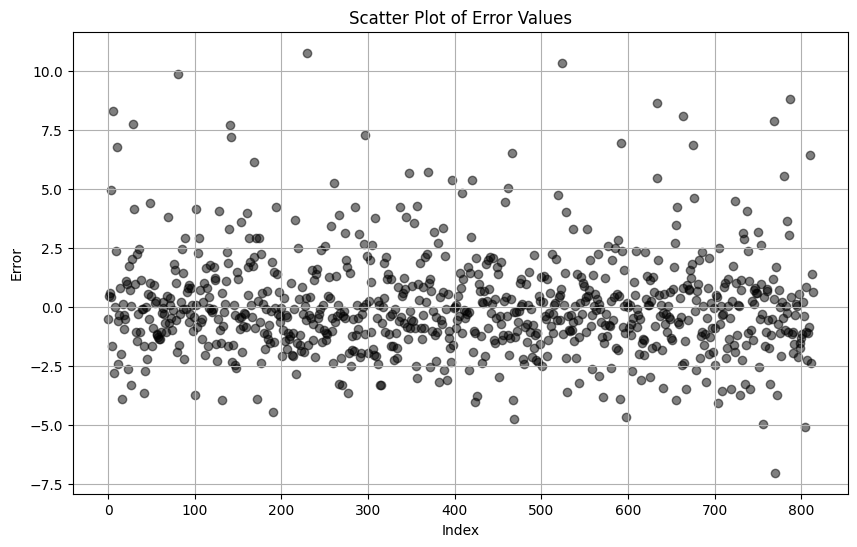

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(prediction_overview['error'])), prediction_overview['error'], color='black', alpha=0.50)
plt.title('Scatter Plot of Error Values')
plt.xlabel('Index')
plt.ylabel('Error')

plt.grid(True)
plt.show()

The scores and predictions look similar as before. However the feature importance got some changes to it. The model uses everything but it barely uses sex. Instead of shucked and whole weight, the lead feature that got the most impact looks to be shell weight. Shucked weight still plays a important role despite the heavy decrease in importance. The remaining features are all kinda in the same range when it comes to importance. Meaning that any edit i make to these features hen using this model will change the result a lot. Which is good to keep track of because just like SVR, I feel like random forest will be a big help.

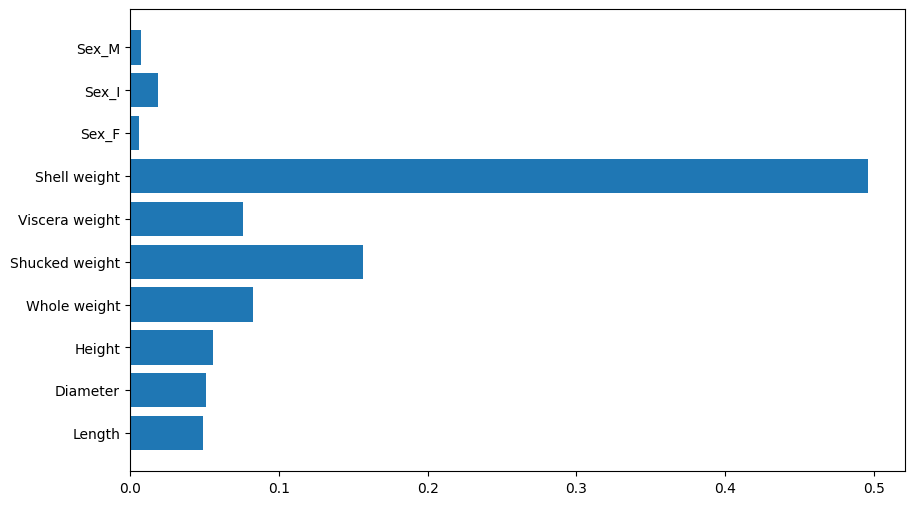

In [70]:
feature_importance = random_forest.feature_importances_
column_names = dataset_abalone_dummies.drop(['Age', 'Rings'], axis=1).columns

plt.figure(figsize=(10, 6))
plt.barh(column_names, feature_importance)

plt.show()

# Neural network - sequential

Now here is something new to me but I understood it as a model that can learn over time several times. We would have to set up more. Like layers, we have to tell it how many features it will have to deal with, we need to give it the appropriate amount of epochs which will act as a pass to learn and go over the dataset once more while making sure it doesn't under or overfit, tell with what kind of losses we are working, perhaps we want to add a optimizer to minimize loss function. There is so much to go through and it is different compared to the models we have been testing on so far. It is interesting to learn more about this while tweaking it since we got so much we can adjust.

For now, let's keep the model simple with not too much adjustment from me to see how it will perform.

Currently we will be using the sequential model which is a linear stack of layers which allows us to build a neural network layer by layer. We will use relu for now as a activation. Relu stands for "rectified linear unit" which introduces non-linearity which helps the model learn complex patterns. Which isn't a direct fit for our model, however it night make the model more flexible which will help with the smaller parts or the grey area in the dataset where data are between being noise and being useful data that relate with the majority. For optimizer, we are using Adam which is a algorithm that combines the properties of AdaGrad and RMSProp. It adapts the learning rate during the training and got a high success rate. The optimizer is optional to add.

Epoch 1/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 138.4609 - val_loss: 130.0381
Epoch 2/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124.7665 - val_loss: 119.1073
Epoch 3/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114.2243 - val_loss: 107.6052
Epoch 4/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 104.1228 - val_loss: 94.4270
Epoch 5/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87.8703 - val_loss: 80.2763
Epoch 6/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74.0680 - val_loss: 66.4658
Epoch 7/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.9441 - val_loss: 54.7337
Epoch 8/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.2784 - val_loss: 45.8129
Epoch 9/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39.9683 - val_loss: 39.4161
Epoch 10/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.7566 - val_loss: 35.2995
Epoch 11/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33.0507 - val_loss: 32.7970
Epoch 12/400
26/26 ━━━━━━━━━━━━━━━

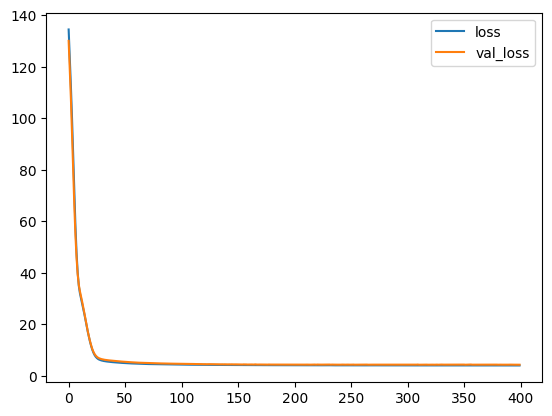

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

losses = pd.DataFrame(model.history.history)
losses.plot()

predictions = model.predict(X_test)

print('R2 Score:', r2_score(y_test, predictions))
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predictions)))

By checking the MSE and MAE compared to the other models, this model is also in the same range as other. However, it is also the best performing one despite being in the same area. This is just a starting point since I mentioned that there is a lot to choose and modify in this model. This could be the most ideal model to tune it in order to have a better prediction.

In [72]:
predictions = model.predict(X_test)

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = prediction_overview["error"]
prediction_overview = prediction_overview.reset_index(drop=True)
print(prediction_overview)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step
     truth  prediction     error
0     11.5   11.521070 -0.021070
1     12.5   11.626647  0.873353
2     12.5   12.366609  0.133391
3      9.5   10.076035 -0.576035
4     20.5   15.254315  5.245685
..     ...         ...       ...
809   12.5   13.535964 -1.035964
810   23.5   18.578012  4.921988
811    9.5   11.527849 -2.027849
812   12.5   11.587842  0.912158
813    8.5    8.214631  0.285369

[814 rows x 3 columns]


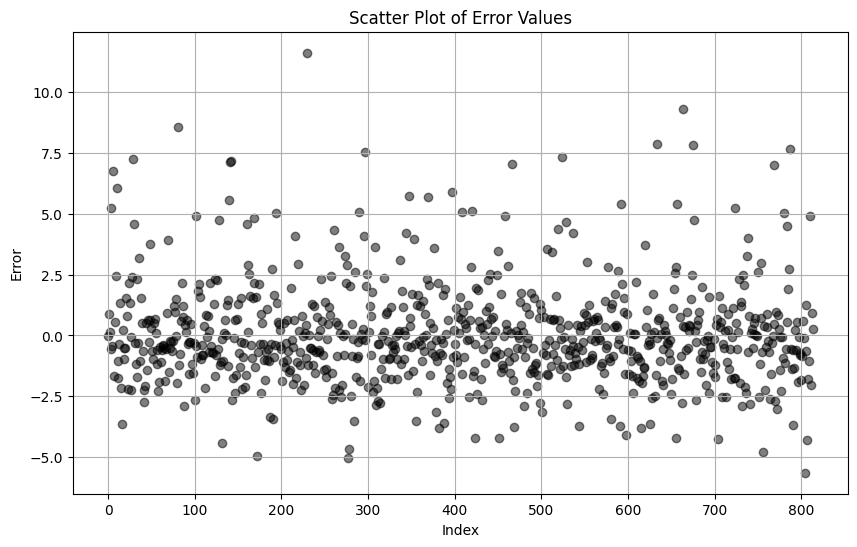

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(prediction_overview['error'])), prediction_overview['error'], color='black', alpha=0.50)
plt.title('Scatter Plot of Error Values')
plt.xlabel('Index')
plt.ylabel('Error')
plt.grid(True)
plt.show()

# Comparing the models

We're gonna let all the models predict one more time and then compare them side by side to see how the models perform. We also let KNN here despite being sure that we are not going to choose that one. The reason why is to see how other models perform next to KNN. if other models are failing incredibly compared to it somehow than it might require our attention to see what is going on since that shouldn't be happening since the others models are supposed to be a much better fit for this dataset. For now, I will choose "Neural Network Sequential" since it seems to have the most potential. However it will be a experimental approach since I know nothing about it. I have better experience and confidence in random forest. So in case the experimental model does not go as I hoped, I will switch back to random forest. However I must stick with a model. The fact that I allow myself to switch like this is a exception since I want to look more into what tensorflow has to offer.

In [74]:
models = [knn_regressor, svr, linear_regression, random_forest, model]
model_names = ['KNN', 'SVR', 'Linear Regression', 'Random Forest', 'Neural Network Squential']
r2_scores = []
mean_absolute_errors = []
mean_squared_errors = []
root_mean_squared_errors = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))
    mean_absolute_errors.append(mean_absolute_error(y_test, y_pred))
    mean_squared_errors.append(mean_squared_error(y_test, y_pred))
    root_mean_squared_errors.append(np.sqrt(mean_squared_error(y_test, y_pred)) )

model_comparison = pd.DataFrame()
model_comparison['Model'] = model_names
model_comparison['R2 Score'] = r2_scores
model_comparison['Mean Absolute Error'] = mean_absolute_errors
model_comparison['Mean Squared Error'] = mean_squared_errors
model_comparison['Root Mean Squared Error'] = root_mean_squared_errors

model_comparison

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 3.8887
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step


Model  R2 Score  Mean Absolute Error  \
0                       KNN  0.499772             1.622604   
1                       SVR  0.527735             1.549697   
2         Linear Regression  0.555943             1.564462   
3             Random Forest  0.571672             1.526880   
4  Neural Network Squential  0.594302             1.485851   

   Mean Squared Error  Root Mean Squared Error  
0            5.440197                 2.332423  
1            5.136082                 2.266293  
2            4.829309                 2.197569  
3            4.658246                 2.158297  
4            4.412138                 2.100509

# Moving on with neural network - sequential

Let's reset the data to the original form while including the feature age and having the dummy variant of sex to see how the model can deal with unmodified data. There is so much to modify and some of these modifications can deal with outliers. By calling the info function we are checking if it reset itself correctly.

In [75]:
old_dummies = dataset_abalone_dummies
dataset_abalone_dummies = pd.get_dummies(dataset_abalone_original)
dataset_abalone_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
 8   Age             4177 non-null   float64
 9   Sex_F           4177 non-null   bool   
 10  Sex_I           4177 non-null   bool   
 11  Sex_M           4177 non-null   bool   
dtypes: bool(3), float64(8), int64(1)
memory usage: 306.1 KB


Since we reset things, let's make sure that the target and features are set up correctly and split it right after.

In [76]:
X = dataset_abalone_dummies.drop(['Age', 'Rings'], axis=1)
Y = dataset_abalone_dummies["Rings"]

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)

Let's take the next step and tweak it more so that the model is "build" specifically for the dataset and the problem we want to solve. So the last layer which will push out the result will not get a activation as well. The loss will now become "mean_absolute_error" because this metric provides a more understandable measure of prediction accuracy in the same units as the target variable. 

Epoch 1/200


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.9172 - mean_absolute_error: 9.9172 - val_loss: 9.9175 - val_mean_absolute_error: 9.9175
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.0012 - mean_absolute_error: 10.0012 - val_loss: 9.9175 - val_mean_absolute_error: 9.9175
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.9106 - mean_absolute_error: 9.9106 - val_loss: 9.9175 - val_mean_absolute_error: 9.9175
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.9381 - mean_absolute_error: 9.9381 - val_loss: 9.9175 - val_mean_absolute_error: 9.9175
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9385 - mean_absolute_error: 9.9385 - val_loss: 9.9175 - val_mean_absolute_error: 9.9175
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.9149 - mean_absolute_error: 9.9149 - val_loss: 9.9175 - val_mean_absolute_error: 9.9175
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9054 - mean_absolute_error: 9.9054 - val_loss: 9.9175 -

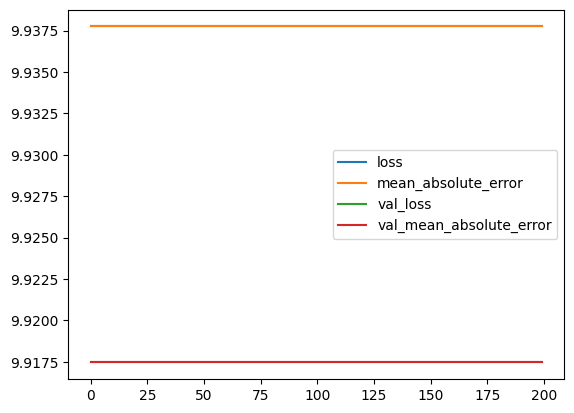

In [77]:
model = Sequential()
model.add(Dense(300, activation='relu', input_shape=(10,), name='Layer_1'))
model.add(Dense(300, activation='relu', name='Layer_2'))
model.add(Dense(1, activation='relu', name='Output'))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

model.fit(x_train, y_train, batch_size=100, epochs=200, verbose=1, validation_data=(x_val, y_val))

losses = pd.DataFrame(model.history.history)
losses.plot()

test = model.evaluate(x_val, y_val, verbose=1)

print(losses.head())

print("MAE", mean_absolute_error(y_val, model.predict(x_val)))
print("MSE", mean_squared_error(y_val, model.predict(x_val)))

So looking at the MAE we can see that the average error gets lower which is great. that means the predictions are getting better. However the MSE is still on a bit of a higher side. It isn't always shown but despite these current scores. Sometimes the model just now makes no predictions at all, putting everything on 0. It's like the model does not even try when it occurs. In the next step I will try to fix that while trying to maintain this logic.

What is unfortunate is that the graph above us have spikes throughout each epochs. That isn't bad on it's own. However a thing called early stopping exists which we could have used to stop overfitting. Basically, if the loss started to increase, early stopping would be there to make a stop for it in order to get the best performance possible. But with the spikes happening regularly, the function early stopping would put a stop to the model prematurely which would give us a unsatisfactory score.

In [78]:
predictions = model.predict(x_val)

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_val
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = prediction_overview["error"]
prediction_overview = prediction_overview.reset_index(drop=True)
print(prediction_overview)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step
     truth  prediction  error
0       11         0.0   11.0
1        9         0.0    9.0
2       14         0.0   14.0
3        8         0.0    8.0
4       10         0.0   10.0
..     ...         ...    ...
831      9         0.0    9.0
832      6         0.0    6.0
833      6         0.0    6.0
834      4         0.0    4.0
835      9         0.0    9.0

[836 rows x 3 columns]


The difference is faint since each attempt there is a small improvement but it seems that most predictions stay in the range from 0 to 2.5 or 0 to -2.5 meaning that most predictions do come close.

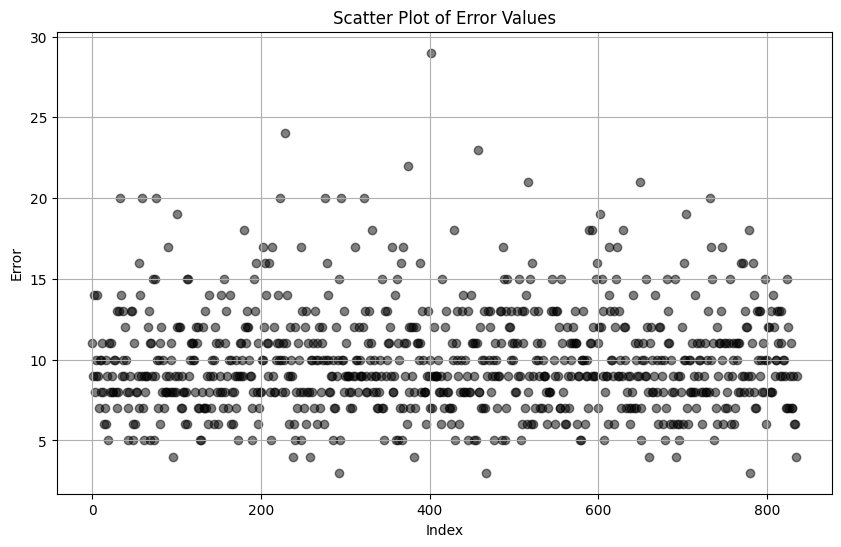

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(prediction_overview['error'])), prediction_overview['error'], color='black', alpha=0.50)
plt.title('Scatter Plot of Error Values')
plt.xlabel('Index')
plt.ylabel('Error')
plt.grid(True)

plt.show()

So by checking the documentation. It seems like ReLu can lead to network predicting a constant value of zero when the input do not activate the outer layer strongly or not at all. This explains why the model sometimes makes no effort and put all it's predictions to 0 and while in other cases, once the neurons get activated it does run as it should and it makes the predictions just fine.By changing the output layer activation to linear the activation allows the network to predict any valued number which fits the task. The activation also makes sure that the output layer is not constrained which makes the whole model overall more stable.

Epoch 1/200


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.6386 - mean_absolute_error: 6.6386 - val_loss: 2.1343 - val_mean_absolute_error: 2.1343
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9677 - mean_absolute_error: 1.9677 - val_loss: 1.8603 - val_mean_absolute_error: 1.8603
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7085 - mean_absolute_error: 1.7085 - val_loss: 1.7673 - val_mean_absolute_error: 1.7673
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6764 - mean_absolute_error: 1.6764 - val_loss: 1.7145 - val_mean_absolute_error: 1.7145
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7579 - mean_absolute_error: 1.7579 - val_loss: 1.6758 - val_mean_absolute_error: 1.6758
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6017 - mean_absolute_error: 1.6017 - val_loss: 1.6152 - val_mean_absolute_error: 1.6152
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5603 - mean_absolute_error: 1.5603 - val_loss: 1.6202 - v

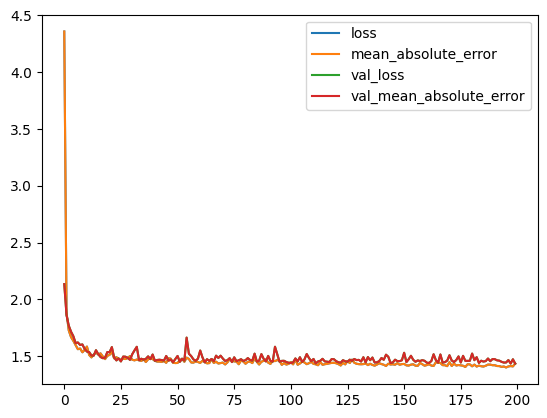

In [80]:
model = Sequential()
model.add(Dense(300, activation='relu', input_shape=(10,), name='Layer_1'))
model.add(Dense(300, activation='relu', name='Layer_2'))
model.add(Dense(300, activation='relu', name='Layer_3'))
model.add(Dense(1, activation='linear', name='Output'))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

model.fit(x_train, y_train, batch_size=100, epochs=200, verbose=1, validation_data=(x_val, y_val))

losses = pd.DataFrame(model.history.history)
losses.plot()

test = model.evaluate(x_val, y_val, verbose=1)

print("MAE", mean_absolute_error(y_val, model.predict(x_val)))
print("MSE", mean_squared_error(y_val, model.predict(x_val)))

print(losses.head())

The scores did not change compared to the last attempt despite the activation change we implemented. A improved result would have been nice but at least now we can confirm that the model works and we can work further on the model which put out the best score so far.

In [81]:
predictions = model.predict(x_val)

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_val
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = prediction_overview["error"]
prediction_overview = prediction_overview.reset_index(drop=True)
print(prediction_overview)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
     truth  prediction     error
0       11   10.778822  0.221178
1        9   10.187545 -1.187545
2       14   11.232173  2.767827
3        8    6.826518  1.173482
4       10   12.037099 -2.037099
..     ...         ...       ...
831      9   11.699154 -2.699154
832      6    6.444558 -0.444558
833      6    6.797121 -0.797121
834      4    6.004194 -2.004194
835      9    8.973960  0.026040

[836 rows x 3 columns]


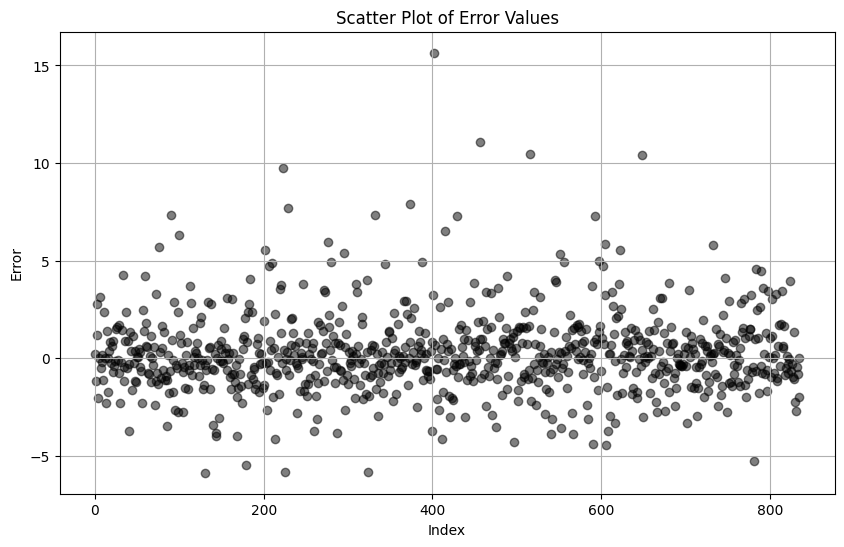

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(prediction_overview['error'])), prediction_overview['error'], color='black', alpha=0.50)
plt.title('Scatter Plot of Error Values')
plt.xlabel('Index')
plt.ylabel('Error')
plt.grid(True)
plt.show()

# Hyperparameter tuning

In order to avoid typos and make my life easier. I will make a function that will build the model were certain layers, output, and the overall structure is set up. The moment when I want to build a model, I need to call the function and fill in the parameters what I want. And that is if I want something else than the default values.

In [83]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import random

def build_model(optimizer='adam', activation='relu', neurons=300, dropout_rate=0.0, input_shape=(10,)):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    return model


The parameter grid will be made where I give in what parameters to try from and see what gives the best result. Normally I want to make use of kerasregressor but due to a problem where the notebook does not want to make use of the installed package, I will try to make a function where it would perform the same idea with the help of itertools.

In [84]:
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'neurons': [100, 200, 300],
    'batch_size': [50, 100, 150],
    'epochs': [100, 200],
    'dropout_rate': [0.0, 0.2, 0.5]}

Same with how gridsearch of randomsearch will act. The parameter grid will be used to try different values just for the model to point out which parameters is the best and give out the score with it as well.

In [85]:
import itertools

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

def random_search(param_grid, x_train, y_train, x_val, y_val, n_iter=20):
    best_mae = float('inf')
    best_params = None
    best_model = None
    
    keys, values = zip(*param_grid.items())
    sampled_combinations = random.sample(list(itertools.product(*values)), n_iter)
    
    for v in sampled_combinations:
        params = dict(zip(keys, v))

        model = build_model(
            optimizer=params['optimizer'],
            activation=params['activation'],
            neurons=params['neurons'],
            dropout_rate=params['dropout_rate'],
            input_shape=(x_train.shape[1],))
        
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        model.fit(x_train, y_train, batch_size=params['batch_size'], epochs=params['epochs'], verbose=0, validation_data=(x_val, y_val), callbacks=[early_stopping])
        
        y_pred = model.predict(x_val)
        mae = mean_absolute_error(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        
        print(f"Params: {params}, MAE: {mae}, MSE: {mse}")

        if mae < best_mae:
            best_mae = mae
            best_params = params
            best_model = model
    
    print(f"Best MAE: {best_mae} with params: {best_params}")
    return best_model, best_params

best_model, best_params = random_search(param_grid, x_train, y_train, x_val, y_val, n_iter=20)

y_pred = best_model.predict(x_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
print("Best Model Evaluation")
print("MAE:", mae)
print("MSE:", mse)

c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Params: {'optimizer': 'rmsprop', 'activation': 'tanh', 'neurons': 300, 'batch_size': 100, 'epochs': 100, 'dropout_rate': 0.0}, MAE: 1.47214462027025, MSE: 4.574361106274193


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Params: {'optimizer': 'rmsprop', 'activation': 'relu', 'neurons': 100, 'batch_size': 100, 'epochs': 100, 'dropout_rate': 0.5}, MAE: 1.4353061503770819, MSE: 4.539876573197073


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Params: {'optimizer': 'rmsprop', 'activation': 'relu', 'neurons': 200, 'batch_size': 150, 'epochs': 200, 'dropout_rate': 0.5}, MAE: 1.4428974492698194, MSE: 4.478038148033846


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Params: {'optimizer': 'adam', 'activation': 'tanh', 'neurons': 300, 'batch_size': 100, 'epochs': 100, 'dropout_rate': 0.5}, MAE: 1.5235678910068349, MSE: 5.292138982230679


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Params: {'optimizer': 'rmsprop', 'activation': 'relu', 'neurons': 300, 'batch_size': 150, 'epochs': 100, 'dropout_rate': 0.0}, MAE: 1.5185506349545346, MSE: 4.860134674651087


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Params: {'optimizer': 'rmsprop', 'activation': 'tanh', 'neurons': 100, 'batch_size': 50, 'epochs': 100, 'dropout_rate': 0.0}, MAE: 1.4626721665619664, MSE: 4.606346492874963


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Params: {'optimizer': 'adam', 'activation': 'tanh', 'neurons': 300, 'batch_size': 50, 'epochs': 100, 'dropout_rate': 0.5}, MAE: 1.47110460078317, MSE: 4.757766651362551


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Params: {'optimizer': 'adam', 'activation': 'relu', 'neurons': 200, 'batch_size': 100, 'epochs': 100, 'dropout_rate': 0.5}, MAE: 1.4498625876800866, MSE: 4.746292661412959


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Params: {'optimizer': 'adam', 'activation': 'relu', 'neurons': 300, 'batch_size': 100, 'epochs': 100, 'dropout_rate': 0.2}, MAE: 1.4737090790671024, MSE: 4.584078001831203


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Params: {'optimizer': 'adam', 'activation': 'relu', 'neurons': 100, 'batch_size': 100, 'epochs': 100, 'dropout_rate': 0.0}, MAE: 1.459796220206758, MSE: 4.612547626425122


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Params: {'optimizer': 'adam', 'activation': 'tanh', 'neurons': 200, 'batch_size': 150, 'epochs': 100, 'dropout_rate': 0.5}, MAE: 1.63382085487603, MSE: 6.214143583479861


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Params: {'optimizer': 'adam', 'activation': 'tanh', 'neurons': 100, 'batch_size': 150, 'epochs': 200, 'dropout_rate': 0.0}, MAE: 1.453379802441483, MSE: 4.673753793671629


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Params: {'optimizer': 'rmsprop', 'activation': 'tanh', 'neurons': 300, 'batch_size': 150, 'epochs': 100, 'dropout_rate': 0.5}, MAE: 1.4615354532260074, MSE: 4.712966386091874


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Params: {'optimizer': 'adam', 'activation': 'relu', 'neurons': 300, 'batch_size': 150, 'epochs': 100, 'dropout_rate': 0.0}, MAE: 1.4661820921601292, MSE: 4.699108758344911


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Params: {'optimizer': 'rmsprop', 'activation': 'tanh', 'neurons': 300, 'batch_size': 100, 'epochs': 200, 'dropout_rate': 0.2}, MAE: 1.4688223848502602, MSE: 4.79790132290407


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Params: {'optimizer': 'adam', 'activation': 'tanh', 'neurons': 300, 'batch_size': 150, 'epochs': 100, 'dropout_rate': 0.5}, MAE: 1.4802100484451037, MSE: 4.878818609259362


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Params: {'optimizer': 'adam', 'activation': 'relu', 'neurons': 200, 'batch_size': 100, 'epochs': 100, 'dropout_rate': 0.0}, MAE: 1.4608458003929357, MSE: 4.592298895090712


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Params: {'optimizer': 'adam', 'activation': 'relu', 'neurons': 100, 'batch_size': 50, 'epochs': 200, 'dropout_rate': 0.2}, MAE: 1.4527701473122008, MSE: 4.646830247731331


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Params: {'optimizer': 'adam', 'activation': 'relu', 'neurons': 100, 'batch_size': 50, 'epochs': 100, 'dropout_rate': 0.5}, MAE: 1.4957085328809383, MSE: 4.841309908948708


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Params: {'optimizer': 'rmsprop', 'activation': 'tanh', 'neurons': 300, 'batch_size': 50, 'epochs': 100, 'dropout_rate': 0.2}, MAE: 1.4676083374821969, MSE: 4.997308153776288
Best MAE: 1.4353061503770819 with params: {'optimizer': 'rmsprop', 'activation': 'relu', 'neurons': 100, 'batch_size': 100, 'epochs': 100, 'dropout_rate': 0.5}
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
Best Model Evaluation
MAE: 1.4353061503770819
MSE: 4.539876573197073


Looking at the score, especially MAE. We managed to improve the model even further. Right now the average error became less than 1 and a half. A model with this error, while there is room for improvement. This proves that a blacklip abalone can be predicted. On top of that, for certain sectors this tool is already useful. I will go more in detail on that a bit later though.

as for the evaluation. We can see that a lot of dots are grouping close to 0 while some dots are far from 0. Those are probably the main reason why the MAE is what it is now since the majority is inside a error of 2.5 while even a closer amount is close to 0.

In [86]:
predictions = best_model.predict(x_val)

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_val
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = prediction_overview["error"]
prediction_overview = prediction_overview.reset_index(drop=True)
print(prediction_overview)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
     truth  prediction     error
0        9   11.767081 -2.767081
1        8    9.081739 -1.081739
2       16   14.355664  1.644336
3        9   10.726561 -1.726561
4       14   11.986386  2.013614
..     ...         ...       ...
831     11   11.096454 -0.096454
832      8    9.309470 -1.309470
833     10    8.777619  1.222381
834      8    8.104176 -0.104176
835      7    6.745422  0.254578

[836 rows x 3 columns]


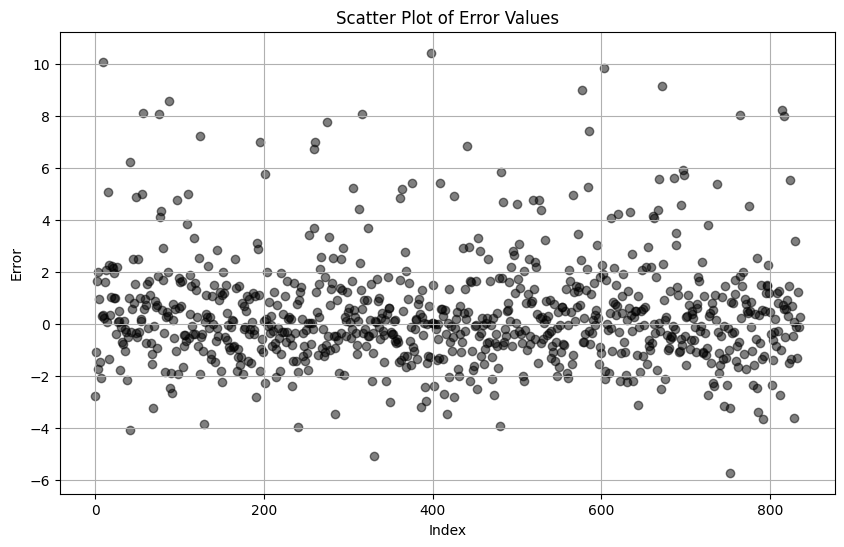

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(prediction_overview['error'])), prediction_overview['error'], color='black', alpha=0.50)
plt.title('Scatter Plot of Error Values')
plt.xlabel('Index')
plt.ylabel('Error')
plt.grid(True)
plt.show()

# Conluding sequential

For now I want to leave the sequential model. It has gotten to a point where it is useful but not incredibly accurate that you can know the age for sure. For now it looks like the model puts out a decent estimation of a abalones age. For now the majority of predictions seem hang around close to 0 by staying within the 2.5 range Now this is the reason why I see that this is useful right now despite the errors seem to scatter above.

The model can predict a age somewhere between 2.5 and 30.5. which means there are 29 guesses with steps of 1, Currently the scores are as follows:

MSE is: 4.572123837927611

MAE is: 1.4447367091498307

the average error is 1.44 (let's round the number). Now let's perform the relative error in percentage. So let's follow the formula:

Relative error in percentage is: (1.4447367091498307 / 29) * 100 = 4.981850721%
So on average the model we see above is 4.931799081% off which is not bad. On average it is almost 1 and a half year off. Which means that retailers can already set a range of grade for abalones, aquaculture workers can make use of this by understanding the age and growth of abalones and are now able to make data driven decisions to enhance the decisions they have to make, marine biologists can already make use with these numbers by tracking the abalones life and pinpointing events straight to their age. So despite the model performance now, we already proved that the model at this very moment can be useful. However for the sake of curiosity I will make a attempt with random forest since that seemed to be promising as well. At the end, a conclusion will be written where we go more in detail about the usefulness of the currents model state and perhaps the soon to be made model as well.

Let's prepare the data first. I will first change the feature sex into a encoded variable so it stays numeric but instead of splitting it into 3 features like it happened with dummies, it will stay as 1 feature where each number represent a gender. so instead of male, female and infant it would be 0, 1 and 2. having dummies is fine with so little categories but I personally didn't like the idea of having 3 different features like that.

# Preparing and changing data

In [88]:
modified_dataset_encoded = dataset_abalone_original
modified_dataset_encoded["Sex"] = modified_dataset_encoded["Sex"].astype("category").cat.as_ordered()
modified_dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   category
 1   Length          4177 non-null   float64 
 2   Diameter        4177 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4177 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4177 non-null   float64 
 8   Rings           4177 non-null   int64   
 9   Age             4177 non-null   float64 
dtypes: category(1), float64(8), int64(1)
memory usage: 298.0 KB


As always we are checking if all went well and it looks like it did.

In [89]:
l_encoder = LabelEncoder()
data_codes = modified_dataset_encoded["Sex"].cat.codes
modified_dataset_encoded["Sex"] =  l_encoder.fit_transform(modified_dataset_encoded["Sex"])

print(modified_dataset_encoded)

      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       2   0.455     0.365   0.095        0.5140          0.2245   
1       2   0.350     0.265   0.090        0.2255          0.0995   
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       2   0.440     0.365   0.125        0.5160          0.2155   
4       1   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    0   0.565     0.450   0.165        0.8870          0.3700   
4173    2   0.590     0.440   0.135        0.9660          0.4390   
4174    2   0.600     0.475   0.205        1.1760          0.5255   
4175    0   0.625     0.485   0.150        1.0945          0.5310   
4176    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings   Age  
0             0.1010        0.1500     15  16.5  
1             0.0485        0.0700      7   8.5  
2             0.1415 

Now since we restarted the data, let's look back which values were sticking out so much that the problem has absolutely no way of knowing what to do with it. Right now I am calling a pairplot to see through the visuals what stick out. When we know which features need to be changed, we will get a closer look at them. Right now it looks like Height, Shucked weight, Shell weight and Viscera weight need some changes since they carry values that stick out exceptionally far from the others.

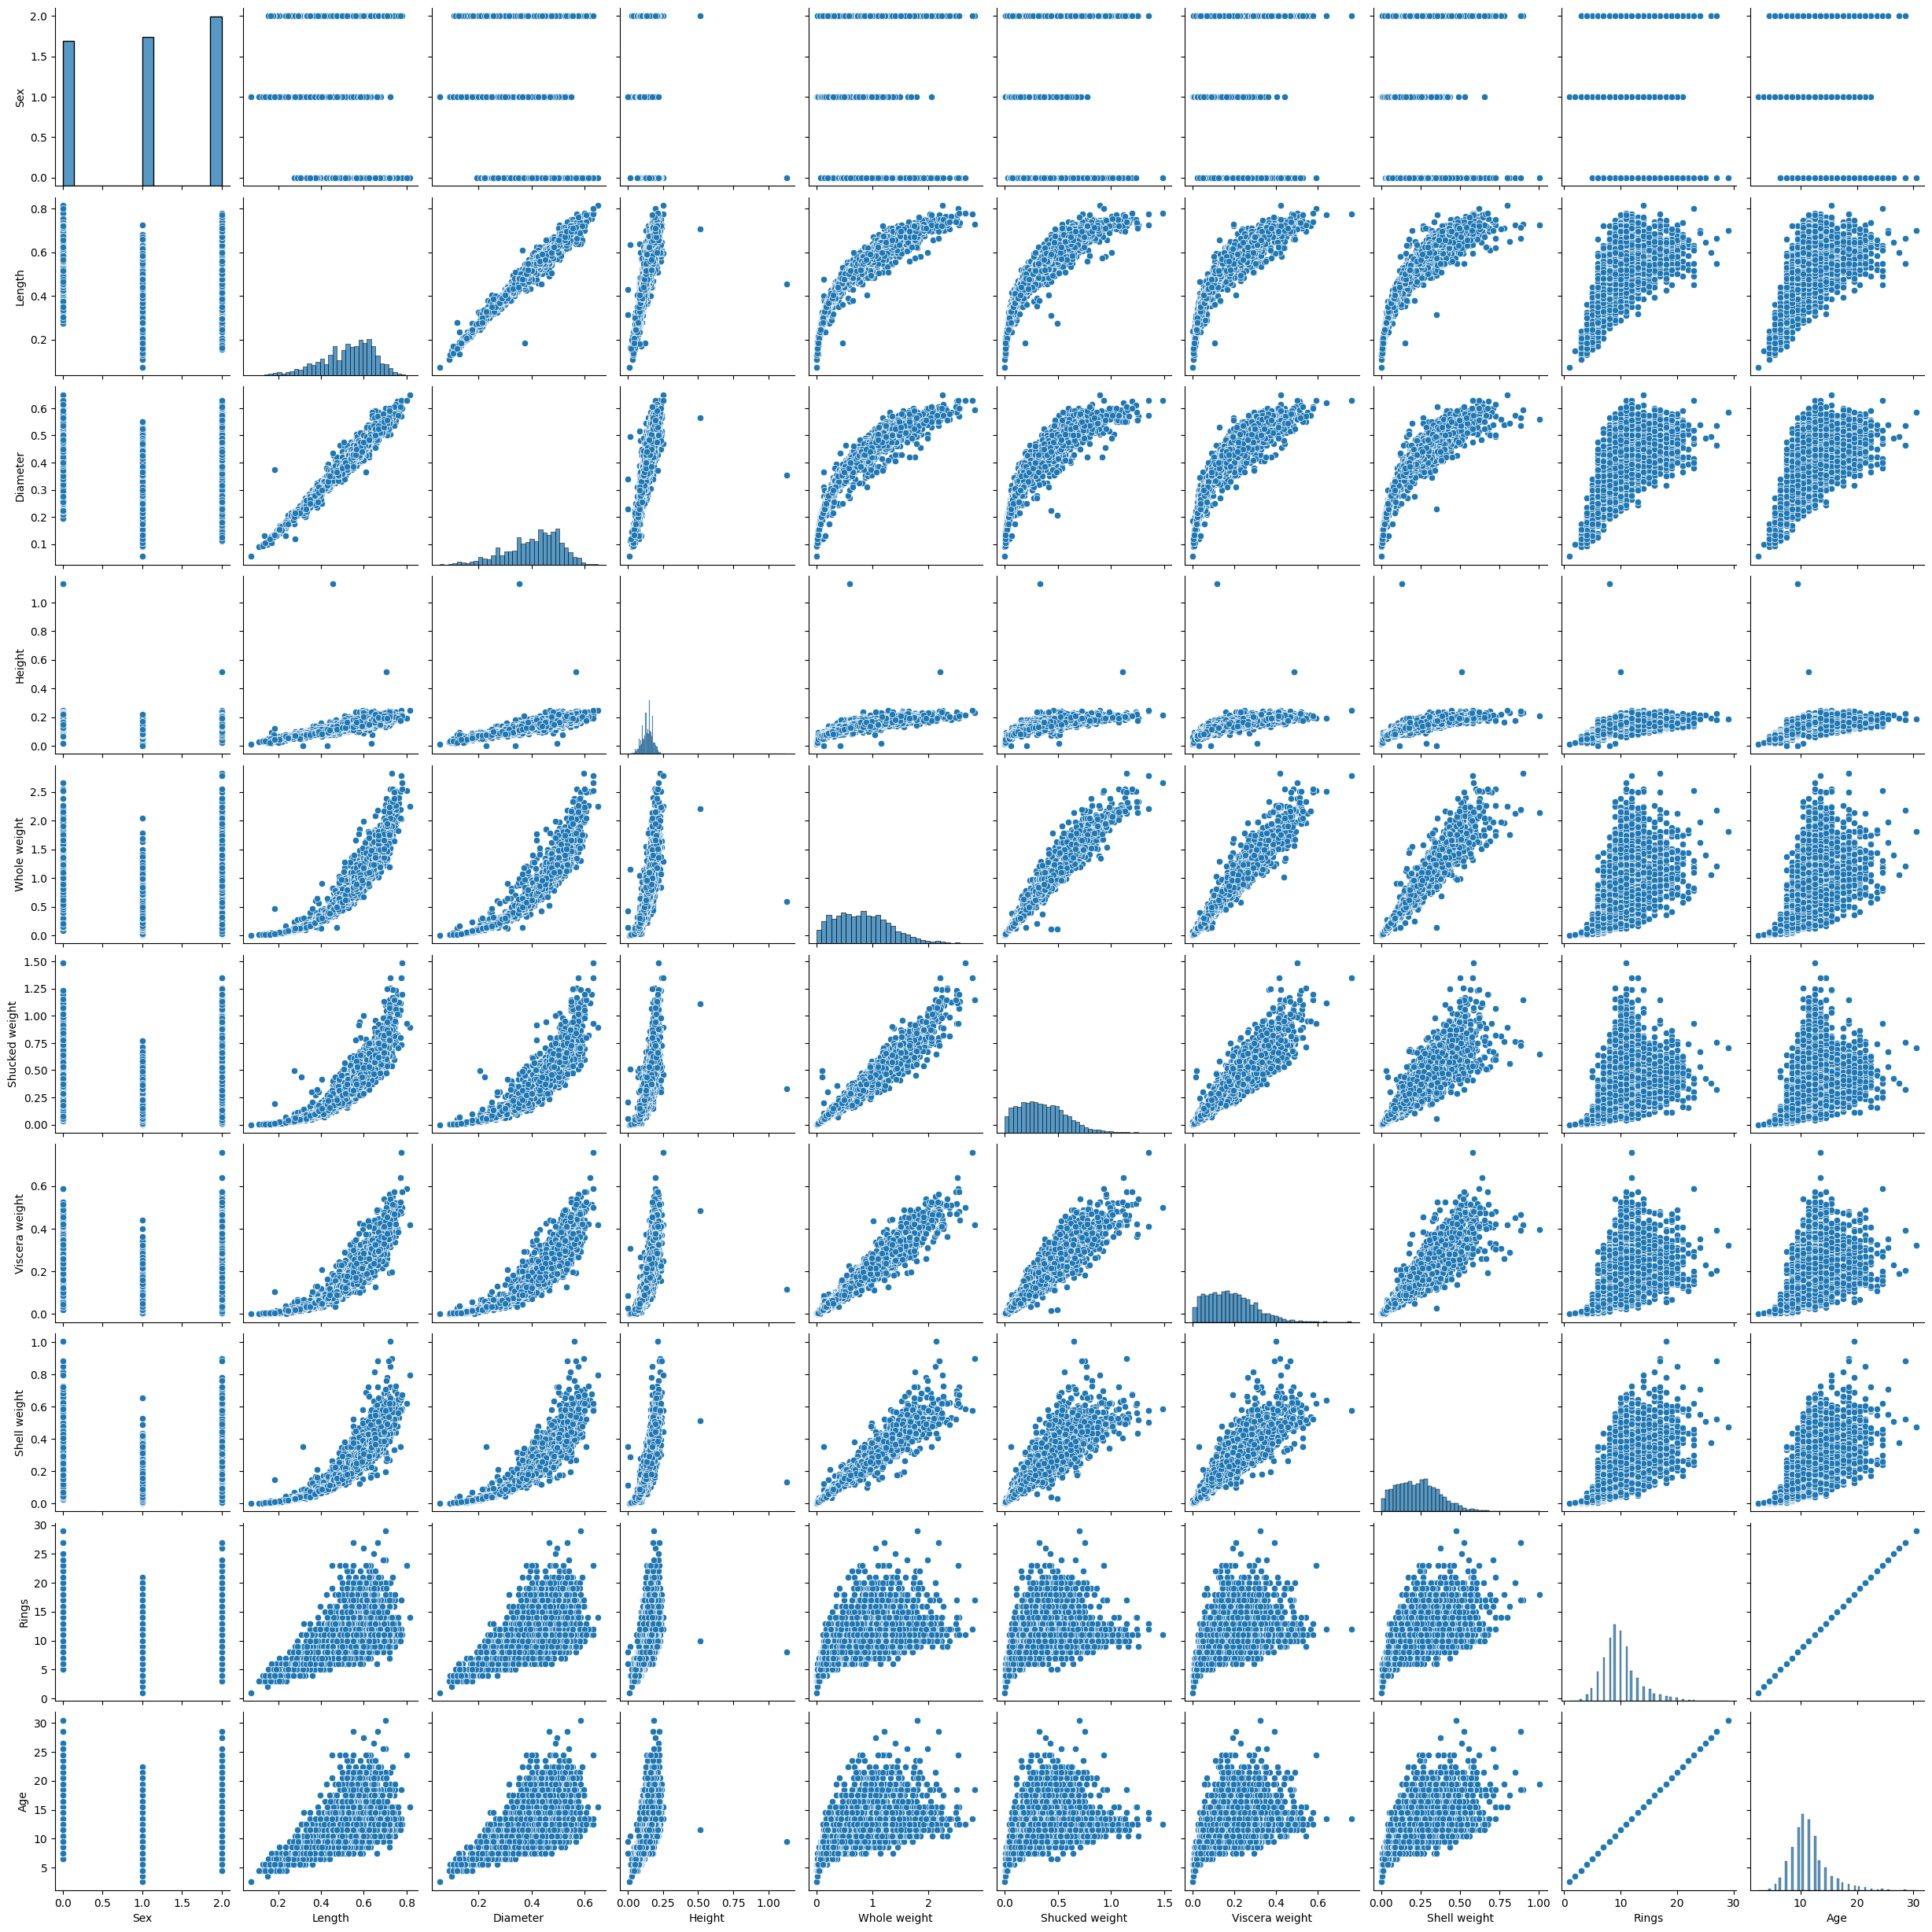

In [90]:
sns.pairplot(modified_dataset_encoded)

There are the outliers we need to cut out. Look at the height for example. 2 values must have been written down by the researchers wrongly. Let's cut them out so that the model can work with data where it can't be bothered by noise. We are being less aggressive compared to before. Some values are still far from where the majority lies but is either nearby or follow a certain "path" which gives the model a chance to understand it.

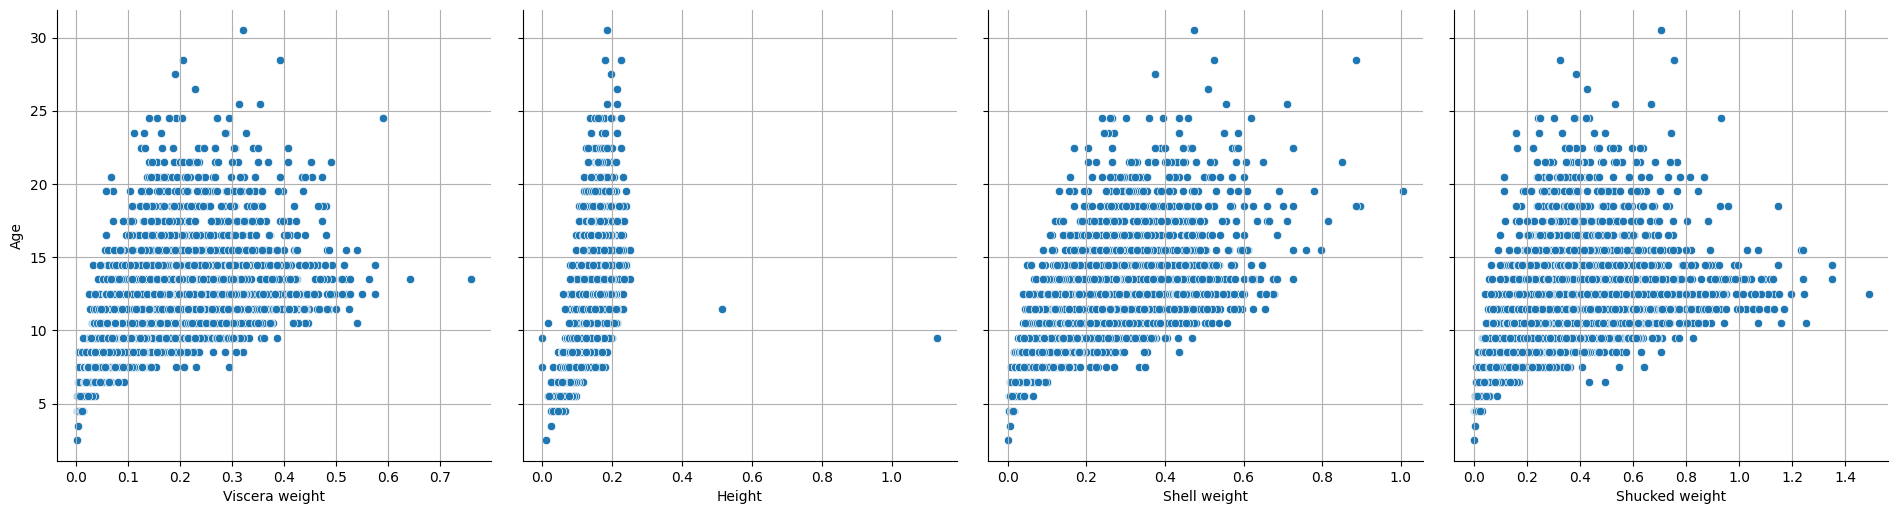

In [91]:
pairplot = sns.pairplot(modified_dataset_encoded, x_vars=['Viscera weight', 'Height', 'Shell weight', 'Shucked weight'], y_vars=['Age'])
pairplot.fig.set_size_inches(20, 6)
for ax in pairplot.axes.flatten():
    ax.grid(True)

Here is where all the cutting out of values happens. Sometimes a action on a feature happens twice like with viscera weight. That is because everything after 0.6 just consists out of 2 values far from the majority and eachother. However after that we also cut something out with the value above 0.5 and above the age of 20. it is because there is one specific dot is on there, so we are being real specific with what we cut out in order to make sure that we don't remove anything that we do want to use.

In [92]:
modified_dataset_encoded.drop(modified_dataset_encoded[(modified_dataset_encoded['Viscera weight'] > 0.6)].index, inplace = True)
modified_dataset_encoded.drop(modified_dataset_encoded[(modified_dataset_encoded['Viscera weight'] > 0.5) & (modified_dataset_encoded['Age'] > 20)].index, inplace = True)

modified_dataset_encoded.drop(modified_dataset_encoded[(modified_dataset_encoded['Height'] > 0.4)].index, inplace = True)

modified_dataset_encoded.drop(modified_dataset_encoded[(modified_dataset_encoded['Shell weight'] > 0.8) & (modified_dataset_encoded['Age'] > 25)].index, inplace = True)

modified_dataset_encoded.drop(modified_dataset_encoded[(modified_dataset_encoded['Shucked weight'] > 1.4)].index, inplace = True)

Before we head on to the modeling part, let's make sure that the features are as we want them to be. It all looks fine. All the exceptional and off track values are gone. There is 1 value above the age of 30 which seems really off too. But the model might be able to catch it on track so let's keep that one in despite it's position.

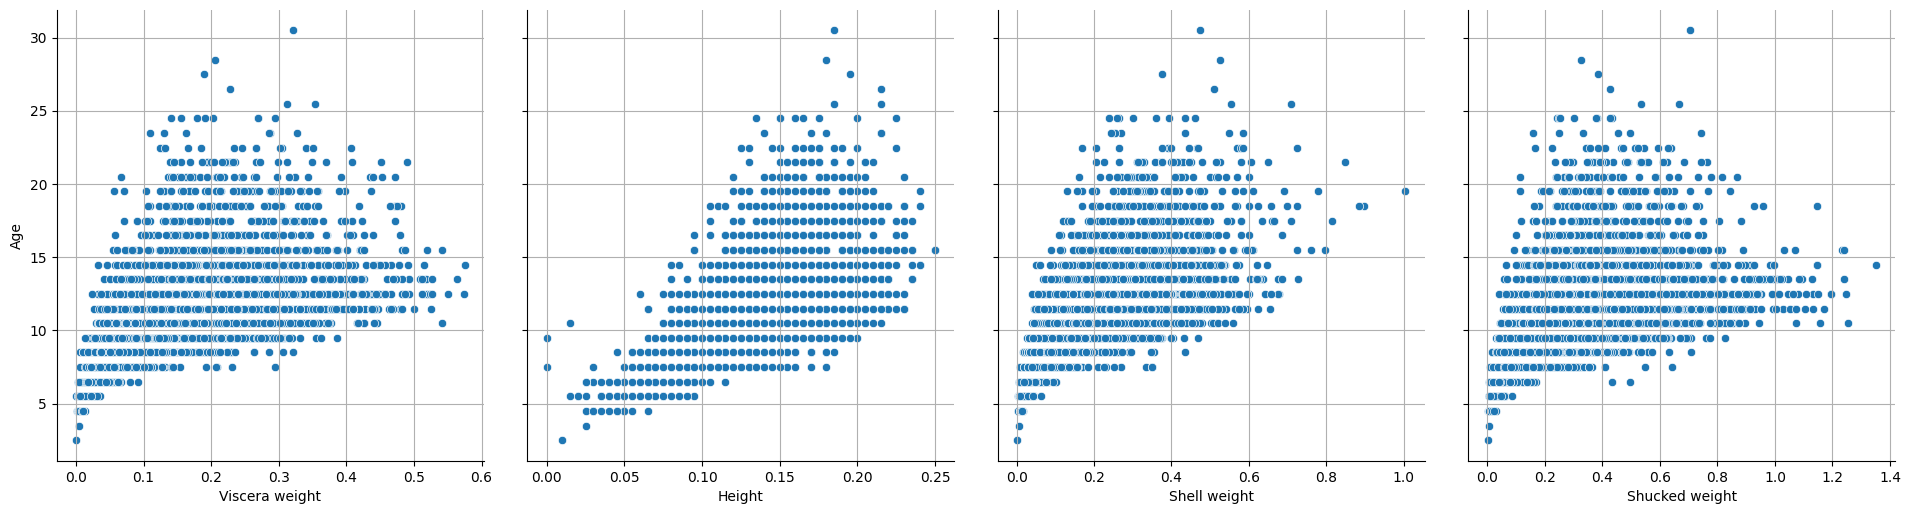

In [93]:
pairplot = sns.pairplot(modified_dataset_encoded, x_vars=['Viscera weight', 'Height', 'Shell weight', 'Shucked weight'], y_vars=['Age'])
pairplot.fig.set_size_inches(20, 6)
for ax in pairplot.axes.flatten():
    ax.grid(True)

# Random forest

Now that we checked and changed the features however we please, let's prepare everything for the model to use. Once again we will drop the targets from X and set up the target at Y and then split the data between training and test set.

In [94]:
X = modified_dataset_encoded.drop(['Age', 'Rings'], axis=1)
y = modified_dataset_encoded["Age"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

So going through the documentation to see if I can tweak the parameters more fit for the job, I stumbled upon n_jobs. It sets the number of jobs to run in parallel. However, if you set the value to -1 it means that all processors available will be used. To make sure it all runs as quick and best it can, I set it to -1 and will do that for any other random forest model later on.

In [95]:
random_forest = RandomForestRegressor(n_jobs=-1, random_state=24)
random_forest.fit(X_train, y_train)

y_pred_test = random_forest.predict(X_test)
print('Mean Squared Error Testing: ', mean_squared_error(y_test, y_pred_test))
print('Mean Absolute Error Testing: ', mean_absolute_error(y_test, y_pred_test))

Mean Squared Error Testing:  5.169563429256596
Mean Absolute Error Testing:  1.5881654676258992


In [96]:
predictions = random_forest.predict(X_test)

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = prediction_overview["error"]
prediction_overview = prediction_overview.reset_index(drop=True)
print(prediction_overview)

     truth  prediction  error
0     12.5       11.96   0.54
1      9.5        8.78   0.72
2     12.5       12.06   0.44
3     11.5       12.91  -1.41
4      8.5       10.11  -1.61
..     ...         ...    ...
829   16.5       11.22   5.28
830   12.5       12.10   0.40
831   11.5       12.35  -0.85
832   14.5       11.06   3.44
833    7.5        8.85  -1.35

[834 rows x 3 columns]


Looking at the score and plot underneath. It seems mostly the same. MAE is not better compared to the last result of the sequential model. But MSE drastically improved. However the model can be tweaked further. The fact that it gets this close at the start might be promising for even better results.

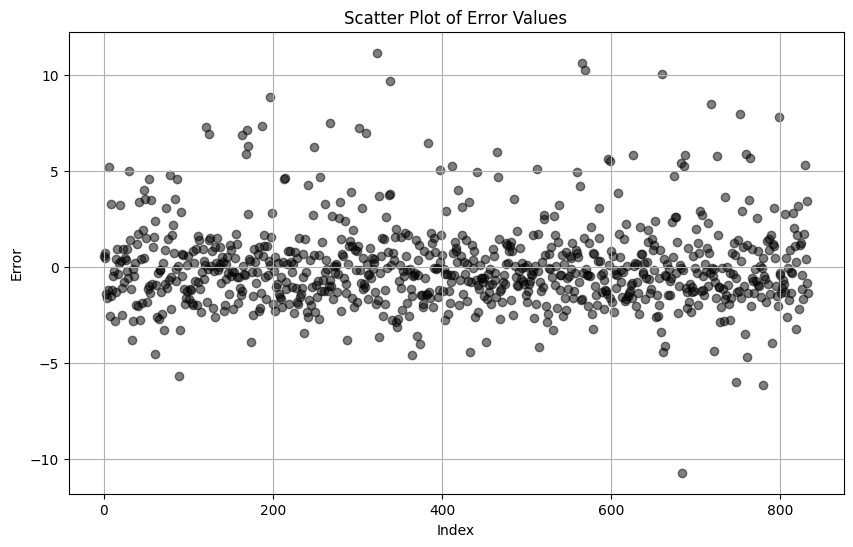

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(prediction_overview['error'])), prediction_overview['error'], color='black', alpha=0.50)
plt.title('Scatter Plot of Error Values')
plt.xlabel('Index')
plt.ylabel('Error')
plt.grid(True)
plt.show()

# finding the best hyperparameters

So in order to find the best hyperparameters that will help the model understand the dataset better, I will use randomizedSearchCV to make it look for the best hyperparameters for random forest. At first we will set the hyperparameters space of search for the random forest model. This way we can specify different values and.or distributors to try different parameters written in the grid.

In [98]:
random_grid = {"n_estimators":[20, 100, 200],"max_depth":[None, 1, 2, 5],"max_features":[0.5, 1, "auto", "sqrt"],"min_samples_split":[ 2, 5, 10],"min_samples_leaf":[1, 2, 3, 5]}
randomforest__model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=51), param_distributions=random_grid, n_iter=100, cv=5, verbose=True)
randomforest__model.fit(X_train, y_train)
print(randomforest__model.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Aynashuku\AppData\Local\Programs\Python\Python311\Lib\site-packa

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 0.5, 'max_depth': None}


In [99]:
y_pred_test = randomforest__model.predict(X_test)
print('Mean Squared Error Testing: ', mean_squared_error(y_test, y_pred_test))
print('Mean Absolute Error Testing: ', mean_absolute_error(y_test, y_pred_test))

Mean Squared Error Testing:  4.933757910801766
Mean Absolute Error Testing:  1.5456673468594968


In [100]:
predictions = randomforest__model.predict(X_test)

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = prediction_overview["error"]
prediction_overview = prediction_overview.reset_index(drop=True)
print(prediction_overview)

     truth  prediction     error
0     12.5   11.785422  0.714578
1      9.5    9.050892  0.449108
2     12.5   12.171248  0.328752
3     11.5   13.365027 -1.865027
4      8.5   10.230200 -1.730200
..     ...         ...       ...
829   16.5   10.965356  5.534644
830   12.5   12.082106  0.417894
831   11.5   12.373104 -0.873104
832   14.5   11.076398  3.423602
833    7.5    9.004465 -1.504465

[834 rows x 3 columns]


A small improvement happened on both MSE and MAE. the plot does seem to clump more towards a error of 0 more. However a small handful got extreme errors. That small bunch is probably the reason for the higher error average. Let's see what got the highest errors to see with what ages it struggles with most. Does it struggle with older abalones because there is so little or is there more to it?

Remember that the list will be printed from highest to lowest. Meaning negative errors are all the way down which could also include big errors which need attention.

In [101]:
sorted_errors = prediction_overview.sort_values(by='error', ascending=False)
print(sorted_errors.to_string())

     truth  prediction      error
323   23.5   12.499612  11.000388
566   24.5   13.970007  10.529993
660   23.5   13.249907  10.250093
339   26.5   16.665275   9.834725
569   21.5   12.189073   9.310927
197   20.5   11.969887   8.530113
718   21.5   13.247669   8.252331
302   24.5   16.421316   8.078684
310   22.5   14.587420   7.912580
798   19.5   11.661631   7.838369
752   19.5   11.674511   7.825489
267   19.5   12.001536   7.498464
383   24.5   17.002777   7.497223
124   19.5   12.006174   7.493826
121   20.5   13.075615   7.424385
171   20.5   13.676261   6.823739
187   21.5   14.835972   6.664028
169   19.5   13.052498   6.447502
164   21.5   15.224950   6.275050
248   18.5   12.263826   6.236174
626   21.5   15.757710   5.742290
42    21.5   15.794067   5.705933
686   21.5   15.809279   5.690721
596   17.5   11.812006   5.687994
687   15.5    9.835266   5.664734
759   21.5   15.913526   5.586474
168   23.5   17.936917   5.563083
829   16.5   10.965356   5.534644
214   18.5   1

What is interesting to see is how positive errors almost only occur with older abalones. Like mentioned earlier. There is so much less data on older abalones so it makes sense it would have a hard time making predictions for that. but when we get to errors to 2.5 and less we can see that those errors almost only occur at ages that we got a lot of information off. what also if weird to see is how negative errors also occur mostly on the age that we got a lot of information on.

So with older abalones it always guesses it too young while with younger or middle aged abalones it can often predict the age more older.

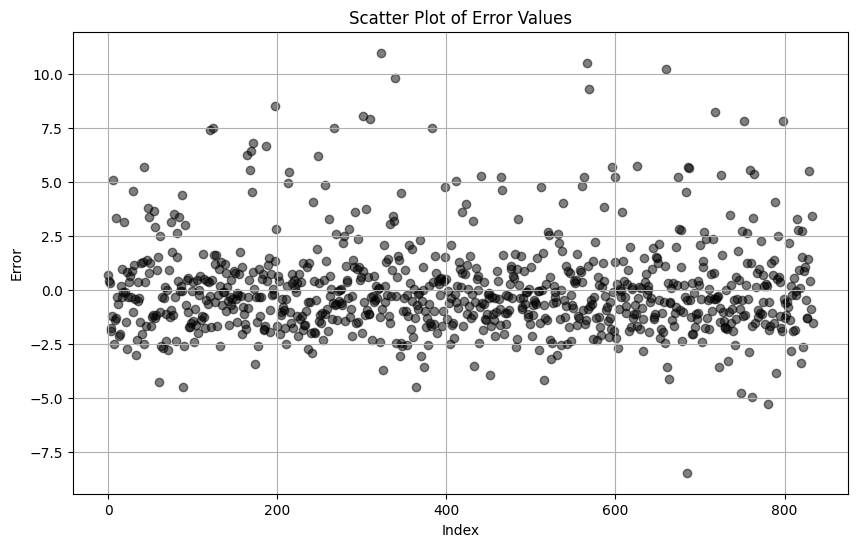

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(prediction_overview['error'])), prediction_overview['error'], color='black', alpha=0.50)
plt.title('Scatter Plot of Error Values')
plt.xlabel('Index')
plt.ylabel('Error')
plt.grid(True)
plt.show()

Before trying to fix the unbalanced issue between the errors in ages. Let's apply the best parameter given just now to see where that will bring us.

In [103]:
ideal_model = RandomForestRegressor(max_depth=None, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=200)
ideal_model.fit(X_train, y_train)

y_pred_test = ideal_model.predict(X_test)
print('Mean Squared Error Testing: ', mean_squared_error(y_test, y_pred_test))
print('Mean Absolute Error Testing: ', mean_absolute_error(y_test, y_pred_test))

Mean Squared Error Testing:  4.945572525563373
Mean Absolute Error Testing:  1.5538814017465292


And that seems make no difference. Probably the best model and score already got put out in the previous attempt automatically. However, since we hard coded the specific hyperparameters here we now got the result and visualizations of this specific variant. We already analyzed the last result so there is no need to go over this one.

In [104]:
predictions = ideal_model.predict(X_test)

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = prediction_overview["error"]
prediction_overview = prediction_overview.reset_index(drop=True)
print(prediction_overview)

     truth  prediction     error
0     12.5   11.639440  0.860560
1      9.5    9.204953  0.295047
2     12.5   12.141001  0.358999
3     11.5   13.129763 -1.629763
4      8.5   10.307777 -1.807777
..     ...         ...       ...
829   16.5   11.048384  5.451616
830   12.5   11.948673  0.551327
831   11.5   12.379472 -0.879472
832   14.5   11.310284  3.189716
833    7.5    9.074232 -1.574232

[834 rows x 3 columns]


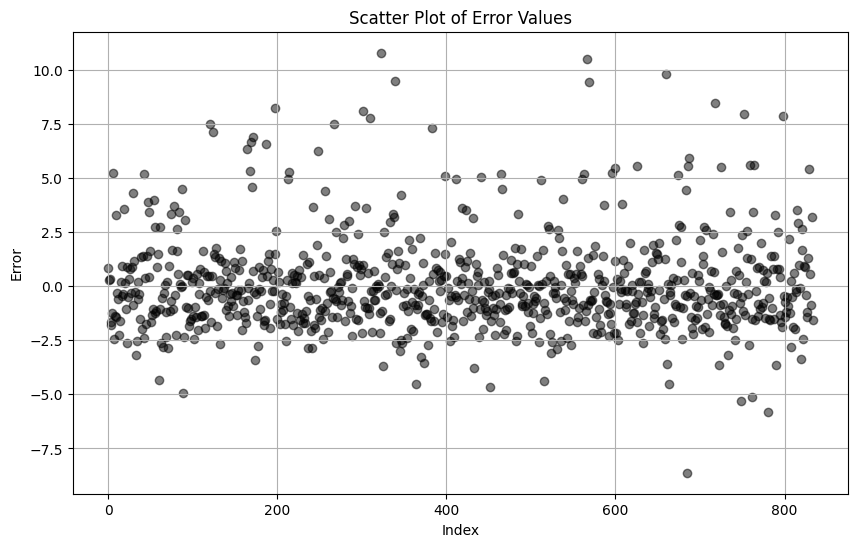

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(prediction_overview['error'])), prediction_overview['error'], color='black', alpha=0.50)
plt.title('Scatter Plot of Error Values')
plt.xlabel('Index')
plt.ylabel('Error')
plt.grid(True)
plt.show()

# Dealing with unbalanced data

Now, as mentioned earlier. We noticed that the model struggles with older abalones because there is so little information on it. Predicting them almost always too young. With abalones that there is a lot of info off it does predict the age correctly in most cases but in plenty of cases it predicts them too old. However, the prediction for those abalones are less extreme compared to older abalones. Old abalones highest error were around a 10 while with the younger abalones the worse error is 4.

So there is a improper balance between all the classes and we can't pull out data out of thin air. So we will make use of SMOTE to battle the imbalance for a attempt to have a better average prediction but also for the model to be able to predict the age of older abalones correctly. because right now, it only could predict a specific range of age correctly.

In [106]:
from imblearn.over_sampling import SMOTE

X = modified_dataset_encoded.drop(['Age', 'Rings'], axis=1)
Y = modified_dataset_encoded["Rings"]

The target right now will be ring. Age is just the ring with a value of 1.5 added on it. Rings is a whole number, a integer. Age isn't a integer but a float. To make things simpler for SMOTE we will make use of a integer. Currently we will say that we need a minimum of 5 abalones per class which is a incredible generous number. Any class that got less than 5 abalone will be cut out. That is because even SMOTE wouldn't know what to do with it. And with just 5 abalones it is already a wonder it can make something of it.

In [107]:
min_count_threshold = 5 
class_counts = pd.Series(Y).value_counts()
rare_classes = class_counts[class_counts < min_count_threshold].index.tolist()

Now we are going to filter out the classes out of X and Y that just got 1 abalone. Otherwise we will get a error.

In [108]:
mask = np.isin(Y, rare_classes)
X_filtered = X[~mask]
Y_filtered = Y[~mask]

After we removed everything unwanted. We can now let smote rebalance the dataset so that random forest can train later with a balanced dataset.

In [109]:
smote = SMOTE(k_neighbors=5)
X_resampled, Y_resampled = smote.fit_resample(X_filtered, Y_filtered)

Now let's compare the original dataset ages with the resampled ones. Now the range from minimal to max age is now different. That is because we cut some classes out for having too little info off. However, at the max age we see a massive spike. We somehow have more of that age than any other. That is weird, let's get a closer look at the numbers.

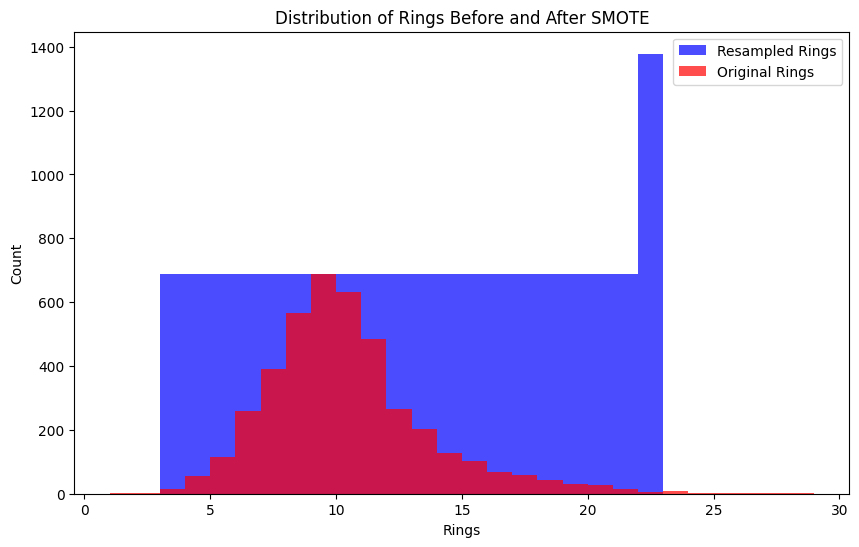

In [110]:
plt.figure(figsize=(10, 6))
plt.hist(Y_resampled, bins=np.arange(min(Y_resampled), max(Y_resampled) + 1, 1), alpha=0.7, color='blue', label='Resampled Rings')
plt.hist(Y, bins=np.arange(min(Y), max(Y) + 1, 1), alpha=0.7, color='red', label='Original Rings')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Rings Before and After SMOTE')
plt.show()

When printing the exact number we can see that the max age, which is 23, is not more of compared to the others. Which is good, meaning it actually is balanced and we don't need to edit it at the moment.

In [111]:
print(Y_resampled.value_counts())

Rings
15    689
18    689
3     689
22    689
17    689
21    689
6     689
4     689
5     689
13    689
12    689
7     689
11    689
14    689
19    689
16    689
20    689
8     689
10    689
9     689
23    689
Name: count, dtype: int64


After all the changes, let's split the data again to make sure the model is getting all the correct information.

In [112]:
x_train, x_val, y_train, y_val = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

Now we are training it on the hyperparameters we got earlier.

In [113]:
model = RandomForestRegressor(max_depth=None, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=200)
model.fit(x_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=200)

In [114]:
test_predictions = model.predict(x_val)
mae = mean_absolute_error(y_val, test_predictions)
print("MAE: " + str(mae))

mse = mean_squared_error(y_val, test_predictions)
print("MSE: " + str(mse))

MAE: 1.1988295830573301
MSE: 3.0631700927032943


In [115]:
predictions = model.predict(x_val) 

prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_val
prediction_overview["prediction"] = predictions
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = prediction_overview["error"]
prediction_overview = prediction_overview.reset_index(drop=True)
print(prediction_overview)

      truth  prediction     error
0        19   18.599466  0.400534
1        22   21.169986  0.830014
2        23   22.422945  0.577055
3         8    8.373865 -0.373865
4        14   10.356098  3.643902
...     ...         ...       ...
2889      6    5.294266  0.705734
2890      7    6.759879  0.240121
2891      4    4.266870 -0.266870
2892     14   11.147158  2.852842
2893     10   14.047940 -4.047940

[2894 rows x 3 columns]


Based on the MAE and MSE numbers we saw, the model improved the accuracy of it's predictions. This time it is predicting rings but age is the rings + 1.5. So adding the number on top of the prediction is manageable. Underneath we can see that mistakes do still happen often, we can also see that the area around the line of 0 error became much thicker too. Meaning that the error overall became a lot less.

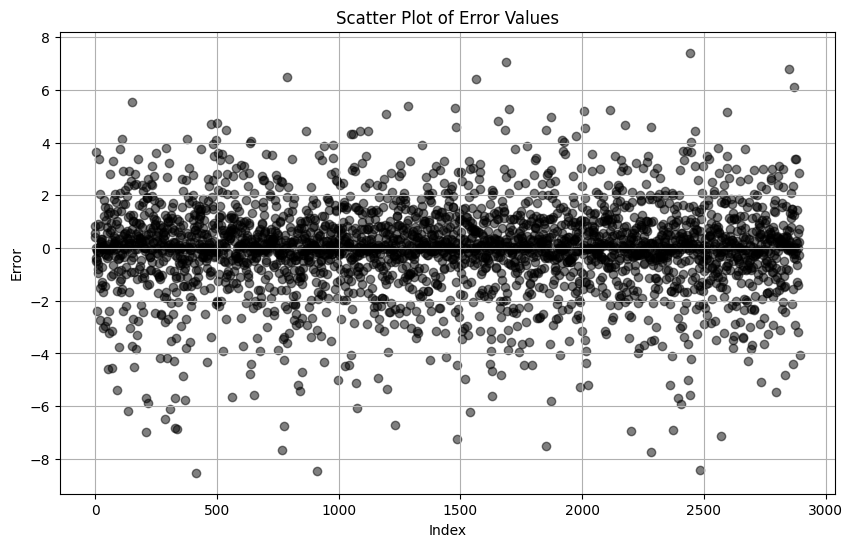

In [116]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(prediction_overview['error'])), prediction_overview['error'], color='black', alpha=0.50)
plt.title('Scatter Plot of Error Values')
plt.xlabel('Index')
plt.ylabel('Error')
plt.grid(True)
plt.show()

In [117]:

sorted_errors = prediction_overview.sort_values(by='error', ascending=False)
print(sorted_errors.to_string())

      truth  prediction     error
2442     13    5.589850  7.410150
1689     18   10.935769  7.064231
2850     21   14.202543  6.797457
789      21   14.514898  6.485102
1566     21   14.585078  6.414922
2869     13    6.888975  6.111025
152      18   12.446950  5.553050
1285     21   15.626013  5.373987
1479     19   13.702505  5.297495
1699     14    8.728385  5.271615
2115     23   17.759755  5.240245
2008     21   15.795151  5.204849
2597     23   17.855339  5.144661
1196     16   10.903880  5.096120
1871     20   15.016277  4.983723
1656     19   14.189972  4.810028
501      17   12.240330  4.759670
476      14    9.306662  4.693338
2178     21   16.323411  4.676589
2285     18   13.407232  4.592768
1481     22   17.410083  4.589917
2010     11    6.441079  4.558921
1853     13    8.509609  4.490391
539      11    6.531517  4.468483
1685     19   14.537484  4.462516
865      17   12.547167  4.452833
1122     18   13.552345  4.447655
1089     23   18.563463  4.436537
2465     17   

# Conclusion

Now let's start with the question if it is possible to predict the age of a blacklip abalone. The answer is yes. It is possible and despite the MAE and MSE it looks like I got it close to being incredibly accurate. With the current best score it is already a tool that can be used in some fields and for certain people.

However, it is far from perfect. There wasn't enough information on older abalones. Meaning that the model can predict the age but only for the age range of 3 till 23. Any abalone younger and older than that must be measured in a different way since the model just doesn't have enough information on them and couldn't learn or struggled learning about them. Having more information on the missing classes will improve the accuracy of the model but also increase the range predictions.

Even without the help of SMOTE. The best MAE and MSE that came out is with the sequential model with the following scores:

MAE: 1.4447367091498307

MSE: 4.572123837927611

Meaning that the model is accurate enough to give a estimation of the abalones age, but also only works for a specific age range. Retailers and fisherman can use this tool to make sure they are working with abalones that are within a appropriate age. Since abalones value grow with age and fisherman can make sure that they don't fish fertile abalones or too much of a age group which could disturb the population. These are just 2 examples but are incredibly important for their own reasons.

In it's current state it can already help people. I have no doubts that with more information, that we can make accurate predictions where the worst errors represent in months and weeks.